In [159]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from pyopls import OPLS
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score

In [160]:
def snv(x):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(x)
    for i in range(x.shape[0]):
 
        # Apply correction
        output_data[i,:] = (x[i,:] - np.mean(x[i,:])) / np.std(x[i,:])
 
    return output_data

# Isoniazid Lab-Made Formulation NIR Studies

### A Proof of Concept : A Case Study Using Doxycycline was demonstrated in the later section  

## Raw Data of the lab made formulation of Isoniazid and Data Analysis of the Raw Data

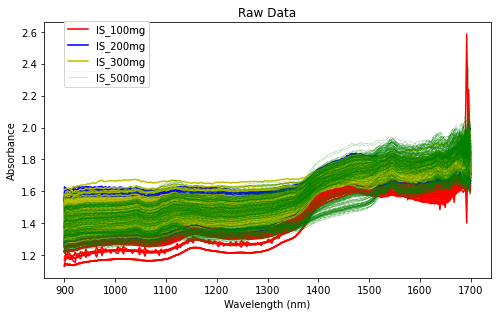

In [2]:
#Lab Formulated Isonized (IS) were housed in broad range of capsules and probed with NIR spectrometer for regression studies

#Visual inspection of line plot of the raw date from lab formulated Isoniazid in varying capsules when introduced to NIR spectrometer

spectra_1 = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')

wv = np.arange(900,1700,3.52) #the wavelength range used for this study

spectra_2 = pd.DataFrame(spectra_1)
spectra_3 = spectra_2.values[0:,0:]
spectra_T_n = spectra_3.T

IS_100mg_RAW =spectra_T_n[:,0:300]
IS_200mg_RAW =spectra_T_n[:,301:524]
IS_300mg_RAW =spectra_T_n[:,525:776]
IS_500mg_RAW =spectra_T_n[:,777:1031]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_RAW, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_RAW, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_RAW, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_RAW, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");


Predictive Models(support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the raw dataset

In [3]:
#Split the dataset (SNV) to train and test sets

X_n= pd.DataFrame(StandardScaler().fit_transform(spectra_T_n))

x_n = X_n.T
y_n = pd.DataFrame(target)
x_train_a,x_test_a,y_train_a,y_test_a = train_test_split(x_n,y_n,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted (mg)')

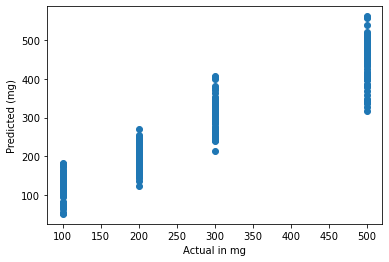

In [4]:
#the raw dataset to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#Train SVM model

regr_n = svm.SVR(kernel='poly',gamma = 0.02, C = 1)
regr_n.fit(x_train_a, y_train_a)

#Test the model

clf_1svr_a = regr_n.predict(x_test_a)

#plot the predicted against actual

plt.scatter(y_test_a,clf_1svr_a)

plt.xlabel("Actual in mg")
plt.ylabel("Predicted (mg)")

In [5]:
#determine the correlation co-efficient (R squared) for SVM-R
q_squared_a1 = r2_score(y_test_a, clf_1svr_a) 
q_squared_a1

0.877922236689431

In [6]:
#determine the root mean sqare error for SVM-R

mean_squared_error(y_test_a, clf_1svr_a,squared=False)

52.2850733315104

In [7]:
#the dataset (OSC) to train and test sets
#OPLS of the raw data

spectra = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')



opls = OPLS(39)
Z = opls.fit_transform(spectra, target)

pls = PLSRegression(1) #nLV = 1

#OPLS for Raw Data
y_preda_raw = cross_val_predict(pls, spectra, target, cv=LeaveOneOut())
q_squared = r2_score(target, y_preda_raw)  

In [8]:
#determinr the correlation co-efficient(R-squared) for raw spectra
q_squared = r2_score(target, y_preda_raw)
q_squared

0.6454037067588276

In [9]:
#determine the root mean sqare error for raw spectra

mean_squared_error(target, y_preda_raw,squared=False)

89.8712729356915

## Data Pretreatment of the Raw Data

### Standard Normal Variate (SNV) folloewed by Savitzki-Golay(SG) Data Pretreatment tranformations of the raw spectra

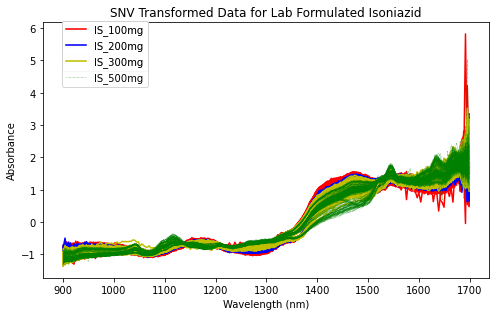

In [11]:
#Visual inspection of line plot of the SNV traeted data from lab formulated Isoniazid in capsules of varying colors and opacities when introduced to NIR spectrometer

#SNV transformation of the raw data

data_isce = pd.read_csv(r'ISCE_data_mg.csv')
x_isce= data_isce.values[:,:]

spectra_snv = snv(x_isce)

spectra_snv_d = pd.DataFrame(spectra_snv)
spectra_snv_ = spectra_snv_d.values[0:,0:]
spectra_T = spectra_snv_.T

#Line plot 

IS_100mg_SNV =spectra_T[:,0:300]
IS_200mg_SNV =spectra_T[:,301:524]
IS_300mg_SNV =spectra_T[:,525:776]
IS_500mg_SNV =spectra_T[:,777:1031]

    
    
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_SNV, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_SNV, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_SNV, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_SNV, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Lab Formulated Isoniazid")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

##  SNV+SG of the lab made formulation 

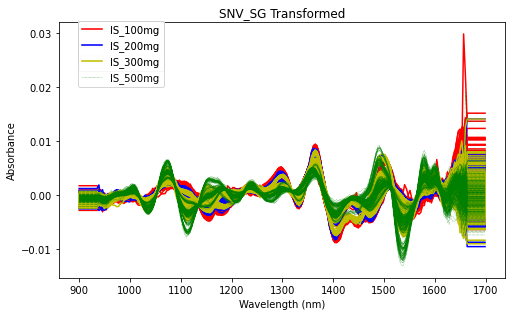

In [12]:
#Visual inspection of line plot of the SNV+SG traeted data from lab formulated Isoniazid in varying capsules when introduced to NIR spectrometer

#SG transformation of the SNV transformed data

Xsnv_sg_ = savgol_filter(spectra_snv, 21, polyorder = 2, deriv=2)

spectra_sg = pd.DataFrame(Xsnv_sg_)
spectra_snvsg = spectra_sg.values[0:,0:]
spectra_T_ = spectra_snvsg.T


#Line plot

IS_100mg_SNVSG =spectra_T_[:,0:300]
IS_200mg_SNVSG =spectra_T_[:,301:524]
IS_300mg_SNVSG =spectra_T_[:,525:776]
IS_500mg_SNVSG =spectra_T_[:,777:1031]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_SNVSG, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_SNVSG, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_SNVSG, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_SNVSG, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV_SG Transformed")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Orthogonal Scattering Correction (0SC) followed by Savitzki-Golay (SG) Data Pretreatment tranformations of the raw spectra

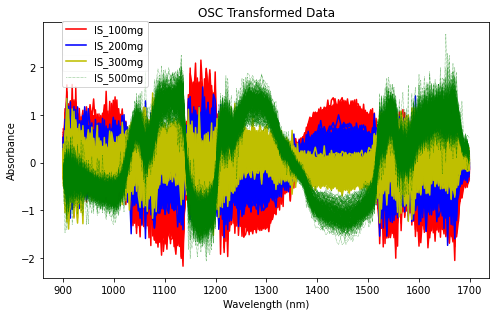

In [13]:
#Visual inspection of line plot of the Orthogonal Signal Correction(OSC) traeted data from lab formulated Isoniazid in capsules of varying colors and opacities when introduced to NIR spectrometer



spectra = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')

opls = OPLS(39)
#snv smoothed data was used

Z_osc = opls.fit_transform(spectra_snv, target)


Z_T = Z_osc.T

IS_100mg_OSC =Z_T[:,0:300]
IS_200mg_OSC =Z_T[:,301:524]
IS_300mg_OSC =Z_T[:,525:776]
IS_500mg_OSC =Z_T[:,777:1031]


wv = np.arange(900,1700,3.52)


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_OSC, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_OSC, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_OSC, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_OSC, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC Transformed Data")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

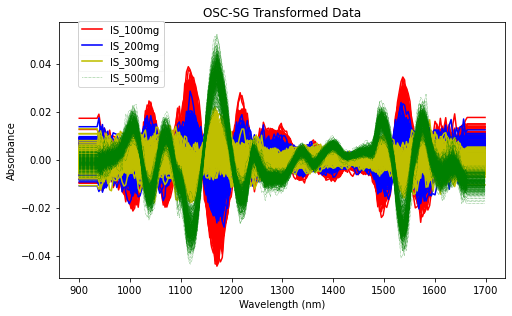

In [14]:
#Visual inspection of line plot of the SNV+OSC+SG traeted data from lab formulated Isoniazid in capsules of varying colors and opacities when introduced to NIR spectrometer

Xosc_sg = savgol_filter(Z_osc, 21, polyorder = 2, deriv=2)


Xosc_sg_T = Xosc_sg.T

IS_100mg_OSC_SG =Xosc_sg_T[:,0:300]
IS_200mg_OSC_SG =Xosc_sg_T[:,301:524]
IS_300mg_OSC_SG =Xosc_sg_T[:,525:776]
IS_500mg_OSC_SG =Xosc_sg_T[:,777:1031]


wv = np.arange(900,1700,3.52)

#plt.plot(wv,Xsnv_sg_T);


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_OSC_SG, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_OSC_SG, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_OSC_SG, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_OSC_SG, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data")



 #Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Predictive Models (support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the SNV dataset

In [15]:
#Split the dataset (SNV) to train and test sets

X_snv_isce= pd.DataFrame(StandardScaler().fit_transform(spectra_T))

#x_snv_isce = X_snv_isce.T
x_snv_isce = spectra_T.T
y_snv_isce = pd.DataFrame(target)
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_snv_isce,y_snv_isce,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted (mg)')

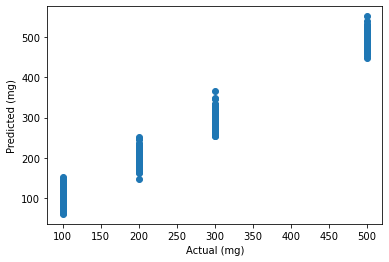

In [16]:
#the dataset (SNV) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised

#Train SVM model

regr = svm.SVR(kernel='poly',gamma = 0.2, C = 1)

regr.fit(x_train_b, y_train_b)

#Test the model

clf_1svr_b = regr.predict(x_test_b)


#plot the predicted against actual

plt.scatter(y_test_b,clf_1svr_b)

plt.xlabel("Actual (mg)")
plt.ylabel("Predicted (mg)")

In [17]:
#determine the correlation co-efficient (R squared) for SVM-R
q_squared_b = r2_score(y_test_b, clf_1svr_b) 
q_squared_b

0.9791339879666848

In [18]:
#determine the root mean sqare error for SVM-R

mean_squared_error(y_test_b, clf_1svr_b,squared=False)

21.616190865909964

In [19]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_b, y_train_b)
    preds = my_plsr.predict(x_test_b)
    
    r2 = r2_score(preds, y_test_b)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9513348099884059 7


Text(0, 0.5, 'Predicted (mg)')

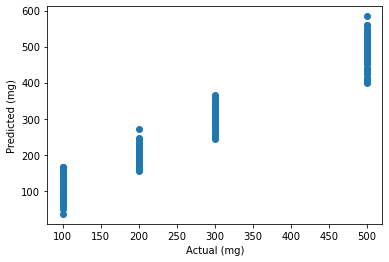

In [20]:
#the dataset (SNV) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1 = PLSRegression(n_components=7)

#Train PLS-R model

pls_1.fit(x_train_b, y_train_b)

#test PLS-R model
Y_pred_b = pls_1.predict(x_test_b)

#plot the predicted against actual
plt.scatter(y_test_b,Y_pred_b)
plt.xlabel("Actual (mg)")
plt.ylabel("Predicted (mg)")

In [21]:
#determine the correlation co-efficient (R squared) 
q_squared_b = r2_score(y_test_b,Y_pred_b) 
q_squared_b

0.9543933827126307

In [22]:
#determine the root mean sqare error 

mean_squared_error(y_test_b, Y_pred_b,squared=False)

31.95754213804427

Predictive Models(support vector machine (SVM) & partial Least square regression(PLS-R)) for the SNV+SG dataset

In [23]:
#Split the dataset (SNV+SG) to train and test sets

X_sgsnv_isce= pd.DataFrame(StandardScaler().fit_transform(spectra_T_))

x_sgsnv_isce = X_sgsnv_isce.T
y_sgsnv_isce = target
x_train_c,x_test_c,y_train_c,y_test_c = train_test_split(x_sgsnv_isce,y_sgsnv_isce,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted (mg)')

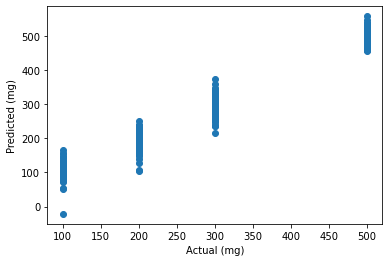

In [24]:
#the dataset (SNV+SG) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#Traun SVM model

regr_c = svm.SVR(kernel='poly',gamma = 0.2, C = 1)
regr_c.fit(x_train_c, y_train_c)

#Test the model

clf_1svr_c = regr_c.predict(x_test_c)

#plot the predicted against actual

plt.scatter(y_test_c,clf_1svr_c)

plt.xlabel("Actual (mg)")
plt.ylabel("Predicted (mg)")

In [25]:
#determine the correlation co-efficient (R squared) for SNV_SG  
q_squared = r2_score(y_test_c,clf_1svr_c) 
q_squared

0.9674542981081728

In [26]:
#determine the root mean sqare error  for SNV_SG 

mean_squared_error(y_test_c,clf_1svr_c,squared=False)

26.99642525979353

Text(0, 0.5, 'Predicted')

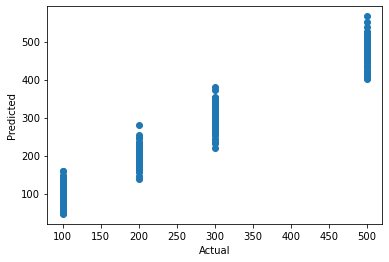

In [27]:
#the dataset (SNV+SG) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1_c = PLSRegression(n_components=7)

#Train PLS-R model

pls_1_c.fit(x_train_c, y_train_c)

#test PLS-R model
Y_pred_c = pls_1_c.predict(x_test_c)

#plot the predicted against actual
plt.scatter(y_test_c,Y_pred_c)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [28]:
#determine the correlation co-efficient (R squared) 
q_squared_c = r2_score(y_test_c, Y_pred_c) 
q_squared_c

0.9515379923609377

In [29]:
#determine the root mean sqare error 

mean_squared_error(y_test_c, Y_pred_c,squared=False)

32.94277200321167

SNV+OPLS (Orthogonal projections to latent structures or Orthogonal Partial Least-Squares - OPLS)

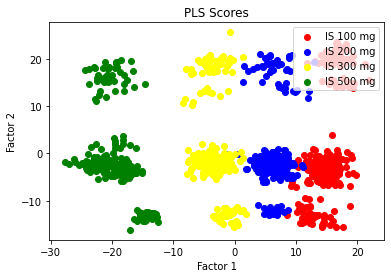

In [30]:
#the dataset (OSC) to train and test sets
spectra = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')



opls = OPLS(39)

Z = opls.fit_transform(spectra_snv, target)

pls = PLSRegression(1)

#OPLS for Raw Data
y_preda_raw = cross_val_predict(pls, spectra, target, cv=LeaveOneOut())
q_squared = r2_score(target, y_preda_raw)  
 


#OPLS for Orthoginal Scatter Corrected Data
processed_y_opls = cross_val_predict(pls, Z, target, cv=LeaveOneOut())
processed_q_squared = r2_score(target, processed_y_opls)  

r2_X = opls.score(spectra) 


plt.figure(1)
pls.fit(Z, target)
df = pd.DataFrame(np.column_stack([pls.x_scores_, opls.T_ortho_[:, 0]]),
                  index=spectra.index, columns=['t', 't_ortho'])    


pos_df = df[0:300]
neg_df = df[301:524]
neg2_df = df[525:776]
neg3_df = df[777:1031]
plt.scatter(pos_df['t'], pos_df['t_ortho'], c='red', label='IS 100 mg')
plt.scatter(neg_df['t'], neg_df['t_ortho'], c='blue', label='IS 200 mg')
plt.scatter(neg2_df['t'], neg2_df['t_ortho'], c='yellow', label='IS 300 mg')
plt.scatter(neg3_df['t'], neg3_df['t_ortho'], c='green', label='IS 500 mg')
plt.title('PLS Scores')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(loc='upper right')
plt.show()

In [31]:
#determine the correlation co-efficient(R-squared) for raw spectra
q_squared = r2_score(target, y_preda_raw)
q_squared

0.6454037067588276

In [32]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra
rocessed_q_squared = r2_score(target, processed_y_opls)
rocessed_q_squared 

0.9674153729052855

In [33]:
#determine the root mean sqare error for raw spectra

mean_squared_error(target, y_preda_raw,squared=False)

89.8712729356915

In [34]:
#determine the root mean sqare error for OSC transformed spectra

mean_squared_error(target, processed_y_opls,squared=False)

27.243328990835217

The performance of the snv smoothed data subjected to orthogonal projection to latent variables showed a better optimal performance compared to other models developed with lower mean square error and more consistent predictions.
We tested this approach on another API, Doxycylcine along with some field collected samples 

# .......................................................

# Doxycycline Lab-Made Formulation NIR Studies

# -----------------------------------------------

DOXYCYCLINE LAB FORMULATION WITH CRYSTALLINE CELLULOSE

#### Import the raw lab formulated Doxycycline

In [36]:
#Import the raw lab formulated Doxycycline
data_dece = pd.read_csv(r'DE_Studies_.csv')
x_dece= data_dece.values[:,3:]

wv = np.arange(900,1700,3.52)

#### Visual inspection of line plot of the raw date from lab formulated Doxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer

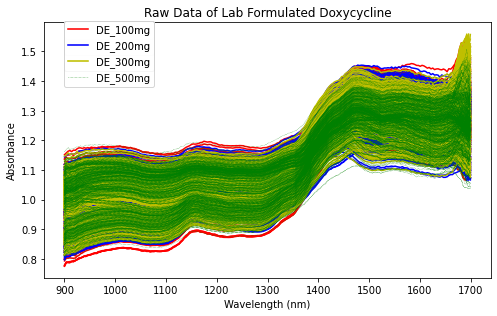

In [37]:
# Visual inspection of line plot of the raw date from lab formulated Doxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer


spectra_dece = pd.read_csv(r'DE_Studies_mg_.csv')
target_dece = pd.read_csv(r'DE_Studies_conc_.csv')

spectra_dece = pd.DataFrame(spectra_dece)
spectra_dece = spectra_dece.values[0:,0:]
spectra_dece_T = spectra_dece.T

DE_100mg_RAW =spectra_dece_T[:,0:492]
DE_200mg_RAW =spectra_dece_T[:,493:1000]
DE_300mg_RAW =spectra_dece_T[:,1001:1495]
DE_500mg_RAW =spectra_dece_T[:,1496:2002]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_RAW, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_RAW, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_RAW, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_RAW, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data of Lab Formulated Doxycycline")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### Predictive Models(support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the raw dataset

In [38]:
#Split the raw dataset to train and test sets

X_dece_n= pd.DataFrame(StandardScaler().fit_transform(spectra_dece_T))

x_dece_n = X_dece_n.T
y_dece_n = pd.DataFrame(target_dece)

x_train_dece_a,x_test_dece_a,y_train_dece_a,y_test_dece_a = train_test_split(x_dece_n,y_dece_n,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

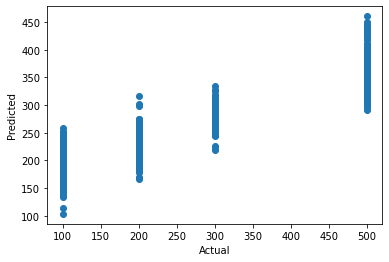

In [39]:
#the raw dataset to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#Train SVM model

regr_dece_n = svm.SVR(kernel='poly',gamma = 0.02, C = 1)
regr_dece_n.fit(x_train_dece_a, y_train_dece_a)

#Test the model

clf_1svr_dece_a = regr_dece_n.predict(x_test_dece_a)


#plot the predicted against actual

plt.scatter(y_test_dece_a,clf_1svr_dece_a)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [40]:
#determine the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(y_test_dece_a,clf_1svr_dece_a)
q_squared_234

0.6182724959832242

In [41]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,clf_1svr_dece_a,squared=False)

91.3835486876951

##### The raw data when not smoothed showed poor performance as displayed earlier

### Visual inspection of line plot of the SNV traeted data from lab formulated Doxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer

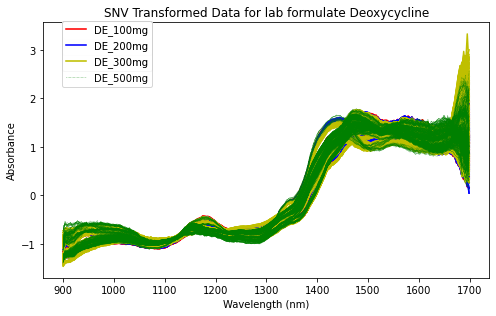

In [42]:
#Visual inspection of line plot of the SNV traeted data from lab formulated Doxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer


data_dece_snv = pd.read_csv(r'DE_Studies_mg_.csv')
x_dece_snv= data_dece_snv.values[:,:]

spectra_dece_snv = snv(x_dece_snv)

spectra_dece_snv = pd.DataFrame(spectra_dece_snv)
spectra_dece_snv = spectra_dece_snv.values[0:,0:]
spectra_dece_snv_T = spectra_dece_snv.T


DE_100mg_SNV =spectra_dece_snv_T[:,0:492]
DE_200mg_SNV =spectra_dece_snv_T[:,493:1000]
DE_300mg_SNV =spectra_dece_snv_T[:,1001:1495]
DE_500mg_SNV =spectra_dece_snv_T[:,1496:2002]


    
    
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_SNV, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_SNV, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_SNV, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_SNV, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for lab formulate Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### Visual inspection of line plot of the SNV+SG traeted data from lab formulated Deoxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer


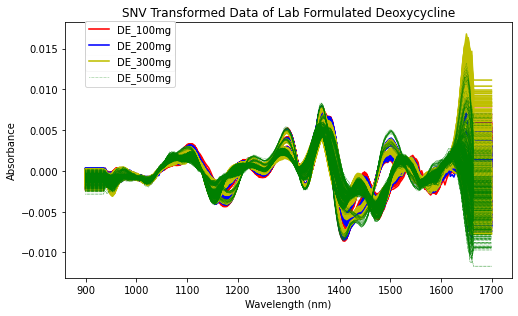

In [43]:
#Visual inspection of line plot of the SNV+SG traeted data from lab formulated Deoxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer

Xsnv_sg_dece = savgol_filter(spectra_dece_snv, 21, polyorder = 2, deriv=2)

spectra_snvsg_dece = pd.DataFrame(Xsnv_sg_dece)
spectra_snvsg_dece = spectra_snvsg_dece.values[0:,0:]
spectra_T_dece = spectra_snvsg_dece.T


DE_100mg_SNVSG =spectra_T_dece[:,0:492]
DE_200mg_SNVSG =spectra_T_dece[:,493:1000]
DE_300mg_SNVSG =spectra_T_dece[:,1001:1495]
DE_500mg_SNVSG =spectra_T_dece[:,1496:2002]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_SNVSG, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_SNVSG, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_SNVSG, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_SNVSG, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### Model development and Evaluation for SNV, and SNV_SG Data Pretreatment

Model development and Evaluation for SNV Data Pretreatment

In [46]:
#Split the dataset (SNV) to train and test sets

X_snv_dece= pd.DataFrame(StandardScaler().fit_transform(spectra_dece_snv_T))

x_snv_dece = X_snv_dece.T
y_snv_dece = target_dece
x_train_dece,x_test_dece,y_train_dece,y_test_dece = train_test_split(x_snv_dece,y_snv_dece,random_state=0,test_size=0.25)

#### the dataset (SNV) to train SVM model and test sets for SVR

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

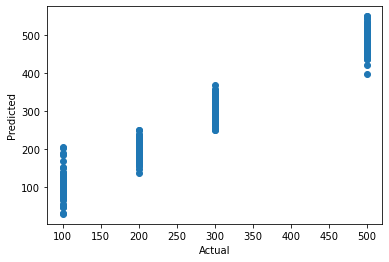

In [47]:
#the dataset (SNV) to train SVM model and test sets

#support vector machine regression model 

#SVM_regression - can be optimised manually or through grid search
#Train SVM model

regr_dece = svm.SVR(kernel='poly',gamma = 0.90, C = 1)
regr_dece.fit(x_train_dece, y_train_dece)

#Test the model

clf_1_svr_dece = regr_dece.predict(x_test_dece)



#plot the predicted against actual

plt.scatter(y_test_dece,clf_1_svr_dece)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [48]:
#determine the correlation co-efficient (R squared) 
q_squared_dece_a1 = r2_score(y_test_dece,clf_1_svr_dece) 
q_squared_dece_a1

0.9723081859569798

In [49]:
#determine the mean square error 

mean_squared_error(y_test_dece, clf_1_svr_dece,squared=False)

24.81072814980493

### the dataset (SNV) to train and test sets for PLS_R

let's try a grid search to identify optimal parameters for SNV treated data

In [50]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_dece, y_train_dece)
    preds = my_plsr.predict(x_test_dece)
    
    r2 = r2_score(preds, y_test_dece)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9001783878825856 14


Text(0, 0.5, 'Predicted')

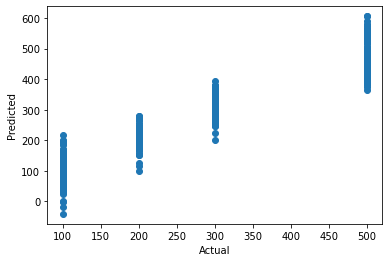

In [51]:
#the dataset (SNV) to train and test sets
#Partial Least square regression model

pls_1_dece = PLSRegression(n_components=14)

#Train PLS-R model

pls_1_dece.fit(x_train_dece, y_train_dece)

#test PLS-R model
Y_pred_snv = pls_1_dece.predict(x_test_dece)

#plot the predicted against actual
plt.scatter(y_test_dece,Y_pred_snv)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [52]:
#determine the correlation co-efficient (R squared) 
q_squared_a1 = r2_score(y_test_dece,Y_pred_snv) 
q_squared_a1

0.9066173352590577

In [53]:
#determine the root mean square error 

mean_squared_error(y_test_dece,Y_pred_snv,squared=False)

45.561387175860716

### Model development and Evaluation for SNV_SG Data Pretreatment

In [54]:
#Split the dataset (SNV_SG) to train and test sets

X_dece_snvsg= pd.DataFrame(StandardScaler().fit_transform(spectra_T_dece))

x_dece_snvsg = X_dece_snvsg.T
y_dece_snvsg = pd.DataFrame(target_dece)
x_train_dece_a,x_test_dece_a,y_train_dece_a,y_test_dece_a = train_test_split(x_dece_snvsg,y_dece_snvsg,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

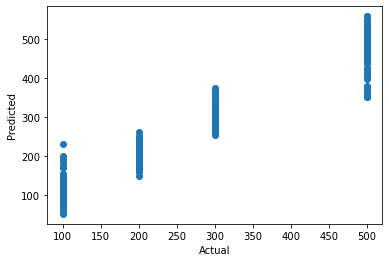

In [55]:
#the dataset (SNV+SG) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#TraIn SVM model

regr_dece_snvsg = svm.SVR(kernel='poly',gamma = 0.02, C = 1)
regr_dece_snvsg.fit(x_train_dece_a, y_train_dece_a)

#Test the model

clf_1svr_dece_snvsg_a = regr_dece_snvsg.predict(x_test_dece_a)


#plot the predicted against actual

plt.scatter(y_test_dece_a,clf_1svr_dece_snvsg_a)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [56]:
#determine the correlation co-efficient (R squared) 
q_squared_dece_snvsg_a1 = r2_score(y_test_dece_a,clf_1svr_dece_snvsg_a) 
q_squared_dece_snvsg_a1

0.9489649208009789

In [57]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,clf_1svr_dece_snvsg_a,squared=False)

33.41378618147424

#### the dataset (SNV+SG) to train and test sets for PLS_R

let's try a grid search to identify optimal parameters for SNV+SG treated data

In [58]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_dece_a, y_train_dece_a)
    preds = my_plsr.predict(x_test_dece_a)
    
    r2 = r2_score(preds, y_test_dece_a)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9041896935681708 13


Text(0, 0.5, 'Predicted')

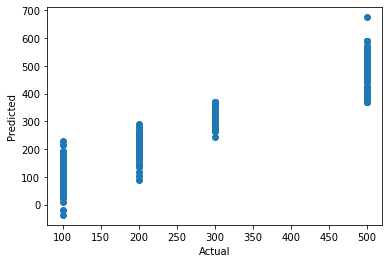

In [59]:
#the dataset (SNV+SG) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1_dece_snvsg_a = PLSRegression(n_components=13)

#Train PLS-R model

pls_1_dece_snvsg_a.fit(x_train_dece_a, y_train_dece_a)

#test PLS-R model
Y_pred_dece_snvsg_a = pls_1_dece_snvsg_a.predict(x_test_dece_a)

#plot the predicted against actual
plt.scatter(y_test_dece_a,Y_pred_dece_snvsg_a)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [60]:
#determine the correlation co-efficient (R squared) 
q_squared_a = r2_score(y_test_dece_a,Y_pred_dece_snvsg_a) 
q_squared_a

0.9110553627653938

In [61]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,Y_pred_dece_snvsg_a,squared=False)

44.111434043337276

## External Validation with Field Collected Samples

In [ ]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 

spectra_dece_dosage_all = pd.read_csv(r'ALL_EXTERNAL_DE_CAPSULES_27.csv')
target_dece_dosage = pd.read_csv(r'ALL_EXTERNAL_DE_CAPSULES_27.csv')
target_dece_dosage_mg = target_dece_dosage.iloc[:,1]
spectra_dece_dosage_= spectra_dece_dosage_all.iloc[:,5:]

## PLOTS

### OSC Treated Data Only

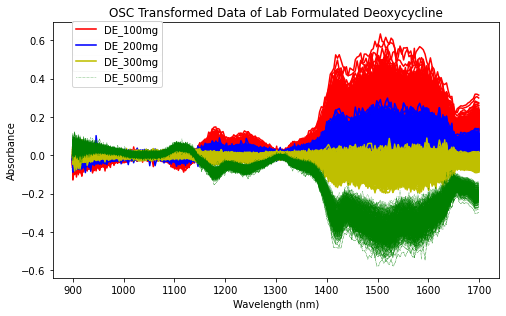

In [161]:
#Visual inspection of line plot of the Orthogonal Signal Correction(OSC) treated data from lab formulated Isoniazid in varying capsules when introduced to NIR spectrometer
#Note that the data was snv smoothed


spectra_dece = pd.read_csv(r'DE_Studies_mg_.csv')
target_dece = pd.read_csv(r'DE_Studies_conc_.csv')

opls = OPLS(39)
#Z_osc_dece = opls.fit_transform(spectra_osc_dece, target_osc_dece)
Z_osc_dece = opls.fit_transform(spectra_dece, target_dece)



Z_T_osc_dece = Z_osc_dece.T

DE_100mg_OSC =Z_T_osc_dece[:,0:492]
DE_200mg_OSC =Z_T_osc_dece[:,493:1000]
DE_300mg_OSC =Z_T_osc_dece[:,1001:1495]
DE_500mg_OSC =Z_T_osc_dece[:,1496:2002]


wv = np.arange(900,1700,3.52)


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_OSC, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_OSC, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_OSC, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### OSC+SG Treated Data Only

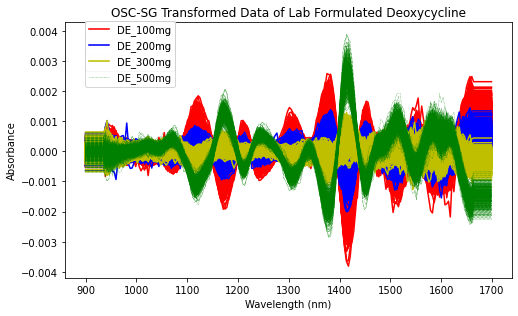

In [162]:
#Visual inspection of line plot of the OSC+SG traeted data from lab formulated Deoxycycline in varying capsules when introduced to NIR spectrometer

Xosc_sg_dece = savgol_filter(Z_osc_dece, 21, polyorder = 2, deriv=2)


Xosc_sg_T_dece = Xosc_sg_dece.T

DE_100mg_OSC_SG =Xosc_sg_T_dece[:,0:492]
DE_200mg_OSC_SG =Xosc_sg_T_dece[:,493:1000]
DE_300mg_OSC_SG =Xosc_sg_T_dece[:,1001:1495]
DE_500mg_OSC_SG =Xosc_sg_T_dece[:,1496:2002]




wv = np.arange(900,1700,3.52)



fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC_SG, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_OSC_SG, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_OSC_SG, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_OSC_SG, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### SNV+OSC Treated Data Only

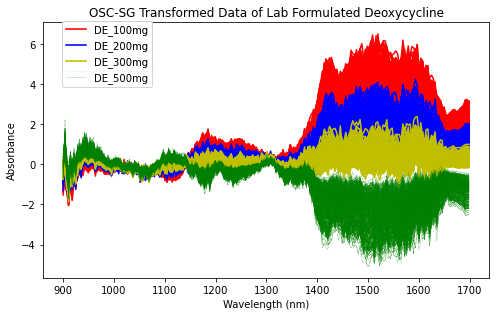

In [163]:
#Visual inspection of line plot of the SNV+OSC traeted data from lab formulated Deoxycycline in varying capsules when introduced to NIR spectrometer

spectra_dece = spectra_dece.to_numpy()

X_SNV_dece = snv(spectra_dece)

Xosc_SNV_dece = opls.transform(X_SNV_dece)


Xosc_sg_T_dece = Xosc_SNV_dece.T

DE_100mg_OSC_SG =Xosc_sg_T_dece[:,0:492]
DE_200mg_OSC_SG =Xosc_sg_T_dece[:,493:1000]
DE_300mg_OSC_SG =Xosc_sg_T_dece[:,1001:1495]
DE_500mg_OSC_SG =Xosc_sg_T_dece[:,1496:2002]




wv = np.arange(900,1700,3.52)



fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC_SG, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_OSC_SG, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_OSC_SG, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_OSC_SG, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### SG+OSC Treated Data Only

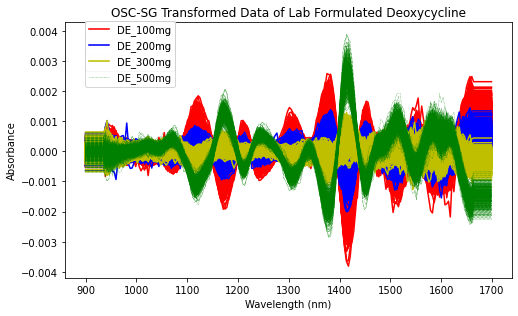

In [164]:
#Visual inspection of line plot of the SG+OSC traeted data from lab formulated Deoxycycline in varying capsules when introduced to NIR spectrometer

X_SG_dece = savgol_filter(spectra_dece, 21, polyorder = 2, deriv=2)

Xosc_SNV_dece = opls.transform(X_SG_dece)


Xosc_sg_T_dece = Xosc_sg_dece.T

DE_100mg_OSC_SG =Xosc_sg_T_dece[:,0:492]
DE_200mg_OSC_SG =Xosc_sg_T_dece[:,493:1000]
DE_300mg_OSC_SG =Xosc_sg_T_dece[:,1001:1495]
DE_500mg_OSC_SG =Xosc_sg_T_dece[:,1496:2002]




wv = np.arange(900,1700,3.52)



fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC_SG, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_OSC_SG, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_OSC_SG, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_OSC_SG, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

### SNV+OSC Treated Data Only

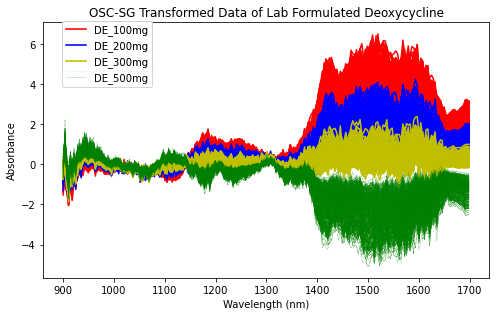

In [165]:
#Visual inspection of line plot of the (SNV + OSC) traeted data from lab formulated Deoxycycline in varying capsules when introduced to NIR spectrometer

X_SNV_dece = snv(spectra_dece)

X_SNVosc_dece = opls.transform(X_SNV_dece)

X_SNVosc_dece_ = X_SNVosc_dece.T

DE_100mg_OSC_SG =X_SNVosc_dece_[:,0:492]
DE_200mg_OSC_SG =X_SNVosc_dece_[:,493:1000]
DE_300mg_OSC_SG =X_SNVosc_dece_[:,1001:1495]
DE_500mg_OSC_SG =X_SNVosc_dece_[:,1496:2002]




wv = np.arange(900,1700,3.52)



fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC_SG, label='DE_100mg',color='r');
ax.plot(wv, DE_200mg_OSC_SG, label='DE_200mg',color='b');
ax.plot(wv, DE_300mg_OSC_SG, label='DE_300mg',color='y');
ax.plot(wv, DE_500mg_OSC_SG, label='DE_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

# Model Calibration 

# ...................................

### OSC ONLY

In [166]:
# Here Orthogonal Scattering Correction based transformation was used to transform lab formulated doxycycline 


Z_osc_dosage_01 = opls.transform(spectra_dece)



#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_osc_dosage_01, target_dece,random_state=0,test_size=0.3)



In [167]:
#Develop the SVM_R model

regr_dece_OSC_dosage = svm.SVR(kernel='linear',gamma = 7, C = 2)

#Train SVM_R model

regr_dece_OSC_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=2, gamma=7, kernel='linear')

In [168]:
#Build PLS_R model

pls_OSC_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_OSC_dece_dosagea = pls_OSC_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#### Evaluate the model

##### Evaluate the developed SVM_R model

In [169]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_OSC_dosagea = regr_dece_OSC_dosage.predict(x_test_dece_dosagea)

#clf_1svr_dece_snvsg_dosagea

In [170]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
rocessed_q_squared_dece = r2_score(y_test_dece_dosagea, clf_1svr_dece_OSC_dosagea)
rocessed_q_squared_dece

0.965030887940206

In [171]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagea, clf_1svr_dece_OSC_dosagea,squared=False)

27.658816627817664

##### Evaluate the developed PLS_R model

In [172]:
#Test the PLS_R model's performance using the test dataset


pls_OSC_dece_dosa =pls_OSC_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa

In [173]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagea, pls_OSC_dece_dosa)
rocessed_q_squared_dece_

0.9567237321794388

In [174]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagea, pls_OSC_dece_dosa,squared=False)

30.769199137782262

## .....................................................

## OSC + SG

In [175]:
# Here Orthogonal Scattering Correction based transformation was used to transform lab formulated doxycycline 

#OSC Data Pretreatment
Z_osc_dece_01 = opls.transform(spectra_dece)

#OSC Data Pretreatment Followed by SG Data Pretreatment

Z_OSC_SG_dece = savgol_filter(Z_osc_dece_01, 21, polyorder = 2, deriv=2)

#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_OSC_SG_dece, target_dece,random_state=0,test_size=0.3)



In [176]:
#Develop the SVM_R model

regr_dece_OSCSG_dosage = svm.SVR(kernel='poly',gamma = 0.7, C = 2)

#Train SVM_R model

regr_dece_OSCSG_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=2, gamma=0.7, kernel='poly')

In [177]:
#Build PLS_R model

pls_OSCSG_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_OSCSG_dece_dosagea = pls_OSCSG_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#### Evaluate the model

##### Evaluate the developed SVM_R model

In [178]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_OSCSG_dosagea = regr_dece_OSCSG_dosage.predict(x_test_dece_dosagea)

#clf_1svr_dece_snvsg_dosagea

In [179]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
rocessed_q_squared_dece = r2_score(y_test_dece_dosagea, clf_1svr_dece_OSCSG_dosagea)
rocessed_q_squared_dece

-0.023926207609022976

In [180]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagea, clf_1svr_dece_OSCSG_dosagea,squared=False)

149.6668513368612

##### Evaluate the developed PLS_R model

In [181]:
#Test the PLS_R model's performance using the test dataset


pls_OSCSG_dece_dosa =pls_OSCSG_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa

In [182]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagea, pls_OSCSG_dece_dosa)
rocessed_q_squared_dece_

0.9597777783456349

In [183]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagea, pls_OSCSG_dece_dosa,squared=False)

29.663631684920166

## .....................................................

### SVN + OSC 

In [184]:
# Here Orthogonal Scattering Correction based transformation was used to transform lab formulated doxycycline 

#SNV Data pretreatment 
Z_snv_dosage_01 = snv(spectra_dece)

#SNV Data pretreatment Followed by OSC Data Pretreatment

Z_snvosc_dosage_01 = opls.transform(Z_snv_dosage_01)



#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_snvosc_dosage_01, target_dece,random_state=0,test_size=0.3)



In [240]:
#Develop the SVM_R model

regr_dece_snvOSC_dosage = svm.SVR(kernel='linear',gamma = 0.9, C = 2)

#Train SVM_R model

regr_dece_snvOSC_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=2, gamma=0.9, kernel='linear')

In [228]:
#Build PLS_R model

pls_SNVOSC_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_SNVOSC_dece_dosagea = pls_SNVOSC_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#### Evaluate the model

##### Evaluate the developed SVM_R model

In [241]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_SNVOSC_dosagea = regr_dece_snvOSC_dosage.predict(x_test_dece_dosagea)

#clf_1svr_dece_snvsg_dosagea

In [242]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
processed_q_squared_dece = r2_score(y_test_dece_dosagea, clf_1svr_dece_SNVOSC_dosagea)
processed_q_squared_dece

0.7246389290488422

In [243]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagea, clf_1svr_dece_SNVOSC_dosagea,squared=False)

77.61444631807284

##### Evaluate the developed PLS_R model

In [190]:
#Test the PLS_R model's performance using the test dataset


pls_SNVOSC_dece_dosa =pls_SNVOSC_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa

In [191]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagea, pls_SNVOSC_dece_dosa)
rocessed_q_squared_dece_

0.8986740798629903

In [192]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagea, pls_SNVOSC_dece_dosa,squared=False)

47.08163875418342

## .....................................................

### SG + OSC

In [193]:
# Here Orthogonal Scattering Correction based transformation was used to transform lab formulated doxycycline 

# SG Data Pretreatment 
Z_SGOSC_dece = savgol_filter(spectra_dece, 21, polyorder = 2, deriv=2)

# SG Data Pretreatment followed by OSC Data pretreatment

Z_SGOSC_dosage_01 = opls.transform(Z_SGOSC_dece)



#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_SGOSC_dosage_01, target_dece,random_state=0,test_size=0.3)



In [194]:
#Develop the SVM_R model

regr_dece_SGOSC_dosage = svm.SVR(kernel='poly',gamma = 29, C = 2)

#Train SVM_R model

regr_dece_SGOSC_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=2, gamma=29, kernel='poly')

In [195]:
#Build PLS_R model

pls_SGOSC_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_1_dece_dosagea = pls_SGOSC_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#### Evaluate the model

##### Evaluate the developed SVM_R model

In [196]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_SGOSC_dosagea = regr_dece_SGOSC_dosage.predict(x_test_dece_dosagea)

#clf_1svr_dece_snvsg_dosagea

In [197]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
rocessed_q_squared_dece = r2_score(y_test_dece_dosagea, clf_1svr_dece_SGOSC_dosagea)
rocessed_q_squared_dece

0.9440157843321084

In [198]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagea, clf_1svr_dece_SGOSC_dosagea,squared=False)

34.99645801702864

##### Evaluate the developed PLS_R model

In [199]:
#Test the PLS_R model's performance using the test dataset


pls_SGOSC_dece_dosa =pls_1_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa

In [200]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagea, pls_SGOSC_dece_dosa)
rocessed_q_squared_dece_

0.9443928463425112

In [201]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagea, pls_SGOSC_dece_dosa,squared=False)

34.87840573410642

## .....................................................

### OSC + SNV 

In [202]:
# Here Orthogonal Scattering Correction based transformation was used to transform lab formulated doxycycline 

#OSC Pretreated Data


Z_osc_dosage01 = opls.transform(spectra_dece)

#OSC Pretreated Data Followed by SNV Pretreated Data

Z_OSCSNV_dosage_01 = snv(spectra_dece)





#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_OSCSNV_dosage_01, target_dece,random_state=0,test_size=0.3)



In [203]:
#Develop the SVM_R model

regr_dece_OSCSNV_dosage = svm.SVR(kernel='poly',gamma = 0.7, C = 2)

#Train SVM_R model

regr_dece_OSCSNV_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=2, gamma=0.7, kernel='poly')

In [204]:
#Build PLS_R model

pls_OSCSNV_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_OSCSNV_dece_dosagea = pls_OSCSNV_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#### Evaluate the model

##### Evaluate the developed SVM_R model

In [205]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_OSCSNV_dosagea = regr_dece_OSCSNV_dosage.predict(x_test_dece_dosagea)

#clf_1svr_dece_snvsg_dosagea

In [206]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
rocessed_q_squared_dece = r2_score(y_test_dece_dosagea, clf_1svr_dece_OSCSNV_dosagea)
rocessed_q_squared_dece

0.9733817200875662

In [207]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagea, clf_1svr_dece_OSCSNV_dosagea,squared=False)

24.13133154246683

##### Evaluate the developed PLS_R model

In [208]:
#Test the PLS_R model's performance using the test dataset


pls_OSCSNV_dece_dosa =pls_OSCSNV_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa

In [209]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagea, pls_OSCSNV_dece_dosa)
rocessed_q_squared_dece_

0.9058353725093086

In [210]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagea, pls_OSCSNV_dece_dosa,squared=False)

45.38738787067911

# Validation

In [244]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 

spectra_dece_dosage_all = pd.read_csv(r'ALL_EXTERNAL_DE_CAPSULES_27.csv')
target_dece_dosage = pd.read_csv(r'ALL_EXTERNAL_DE_CAPSULES_27.csv')
target_dece_dosage_mg = target_dece_dosage.iloc[:,1]
spectra_dece_dosage_= spectra_dece_dosage_all.iloc[:,5:]


### OSC ONLY

In [245]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 

Z_dece_DOSAGE_ = opls.transform(spectra_dece_dosage_)

#Z_dece_DOSAGE_27  = savgol_filter(Z_dece_DOSAGE_, 21, polyorder = 2, deriv=2)

In [246]:
#Predict the external samples - doxyxyxline capsules from field settings

regr_OSC_dece_dosaext =regr_dece_OSC_dosage.predict(Z_dece_DOSAGE_)

regr_OSC_dece_dosaext = pd.DataFrame(regr_OSC_dece_dosaext)


#regr_OSC_dece_dosaext.to_csv('osc_pls_27_de_external')
regr_OSC_dece_dosaext

0
0   583.850526
1   636.850331
2   642.214903
3   628.271780
4   643.658290
5   519.646562
6   479.463254
7   459.661470
8   499.280719
9   490.450212
10  461.153099
11  458.371220
12  440.217884
13  485.839421
14  489.169446
15  431.690827
16  407.524039
17  472.608213
18  519.669027
19  509.809560
20  511.346466
21  433.274269
22  427.359238
23  422.998681
24  450.806181
25  456.144339

In [247]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_OSC_dece_dosaext =pls_OSC_dece_dosagea.predict(Z_dece_DOSAGE_)

pls_OSC_dece_dosaext = pd.DataFrame(pls_OSC_dece_dosaext)

#pls_OSC_dece_dosaext.to_csv('osc_pls_27_de_external')

pls_OSC_dece_dosaext

0
0   576.457854
1   621.313219
2   627.491644
3   618.378501
4   628.515815
5   524.111675
6   481.662828
7   454.993870
8   498.554716
9   496.039169
10  458.968407
11  464.771265
12  432.982729
13  492.079172
14  491.961952
15  431.657370
16  399.289405
17  467.293923
18  524.413563
19  508.958858
20  510.909067
21  437.029554
22  426.657587
23  427.742482
24  436.139274
25  449.897172

### OSC + SG

In [248]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 

Z_dece_DOSAGE_osc = opls.transform(spectra_dece_dosage_)

Z_dece_DOSAGE_27_oscsg  = savgol_filter(Z_dece_DOSAGE_osc, 21, polyorder = 2, deriv=2)

In [249]:
#Predict the external samples - doxyxyxline capsules from field settings

regr_oscsg_dece_dosaext =regr_dece_OSCSG_dosage.predict(Z_dece_DOSAGE_27_oscsg)

regr_oscsg_dece_dosaext = pd.DataFrame(regr_oscsg_dece_dosaext)


#regr_oscsg_dece_dosaext.to_csv('oscsg_regr_27_de_external')

regr_oscsg_dece_dosaext

0
0   250.0
1   250.0
2   250.0
3   250.0
4   250.0
5   250.0
6   250.0
7   250.0
8   250.0
9   250.0
10  250.0
11  250.0
12  250.0
13  250.0
14  250.0
15  250.0
16  250.0
17  250.0
18  250.0
19  250.0
20  250.0
21  250.0
22  250.0
23  250.0
24  250.0
25  250.0

In [250]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_OSCSG_dece_dosaext =pls_OSCSG_dece_dosagea.predict(Z_dece_DOSAGE_27_oscsg)

pls_OSCSG_dece_dosaext = pd.DataFrame(pls_OSCSG_dece_dosaext)


#pls_OSCSG_dece_dosaext.to_csv('oscsg_pls_27_de_external')

pls_OSCSG_dece_dosaext

0
0   597.390868
1   650.523048
2   655.234626
3   642.803561
4   654.868587
5   516.675574
6   479.794079
7   458.976897
8   494.338348
9   496.951933
10  460.638744
11  460.423323
12  436.233483
13  485.894422
14  490.053817
15  433.703646
16  405.089982
17  474.742549
18  526.088606
19  511.408317
20  513.118664
21  437.168578
22  431.080040
23  424.347967
24  445.658528
25  455.049766

### SVN + OSC

In [258]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 
spectra_dece_dosage_ = spectra_dece_dosage_.to_numpy()


spectra_dece_dosage_snv = snv(spectra_dece_dosage_)

Z_dece_DOSAGE_snvosc = opls.transform(spectra_dece_dosage_snv)


In [259]:
#Predict the external samples - doxyxyxline capsules from field settings

regr_snvosc_dece_dosaext =regr_dece_snvOSC_dosage.predict(Z_dece_DOSAGE_snvosc)

regr_snvosc_dece_dosaext = pd.DataFrame(regr_snvosc_dece_dosaext)


#regr_snvosc_dece_dosaext.to_csv('snvosc_regr_27_de_external')

regr_snvosc_dece_dosaext

0
0   2129.594802
1   3144.366484
2   3425.414989
3   2869.265887
4   3402.217036
5   1612.407189
6   1066.809063
7    915.829393
8   1438.604447
9   1190.939447
10   929.364935
11   967.261413
12   808.837626
13  1379.183767
14  1285.495325
15   954.890973
16   824.599157
17  1266.251835
18  1667.584584
19  1533.812318
20  1602.058793
21  1044.963267
22   928.728255
23   917.200215
24  1123.867758
25  1093.229396

In [261]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_SNVOSC_dece_dosaext =pls_SNVOSC_dece_dosagea.predict(Z_dece_DOSAGE_snvosc)

pls_SNVOSC_dece_dosaext = pd.DataFrame(pls_SNVOSC_dece_dosaext)

#pls_SNVOSC_dece_dosaext.to_csv('snvosc_pls_27_de_external')

pls_SNVOSC_dece_dosaext

0
0   1911.312511
1   2542.309267
2   2500.491293
3   2646.725761
4   2757.093745
5   1802.536555
6   1844.102963
7   1398.597687
8   2101.414516
9   2008.562576
10  1407.276951
11  1981.833593
12  1392.168682
13  1697.972006
14  1422.423894
15   999.945999
16   757.653033
17  1279.615086
18  1927.613155
19  1656.858480
20  1743.672029
21  1155.958296
22  1013.361557
23   959.787761
24   591.446962
25  1287.055580

### SG + OSC

In [262]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 

Z_dece_DOSAGE_sg  = savgol_filter(spectra_dece_dosage_, 21, polyorder = 2, deriv=2)

Z_dece_DOSAGE_sgosc = opls.transform(Z_dece_DOSAGE_sg)


In [267]:
#Predict the external samples - doxyxyxline capsules from field settings

regr_sgosc_dece_dosaext =regr_dece_SGOSC_dosage.predict(Z_dece_DOSAGE_sgosc)

regr_sgosc_dece_dosaext = pd.DataFrame(regr_sgosc_dece_dosaext)


#regr_sgosc_dece_dosaext.to_csv('sgosc_regr_27_de_external')

regr_sgosc_dece_dosaext

0
0   284.633418
1   304.540653
2   303.715140
3   324.100052
4   314.509961
5   577.621579
6   531.542854
7   506.393308
8   582.852812
9   500.949475
10  509.493133
11  521.769929
12  489.200517
13  537.720637
14  565.149719
15  414.105381
16  410.972550
17  414.216140
18  495.307607
19  463.118638
20  475.798220
21  414.069034
22  457.264765
23  391.267893
24  459.287518
25  437.823218

In [268]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_sgosc_dece_dosaext =pls_1_dece_dosage.predict(Z_dece_DOSAGE_sgosc)

pls_sgosc_dece_dosaext = pd.DataFrame(pls_sgosc_dece_dosaext)

#pls_sgosc_dece_dosaext.to_csv('sgosc_pls_27_de_external')

pls_sgosc_dece_dosaext

0
0   227.961745
1   263.503663
2   247.901826
3   277.230923
4   272.316433
5   596.568367
6   532.693143
7   478.218493
8   603.232120
9   499.593974
10  475.952688
11  520.578444
12  465.408831
13  534.548693
14  568.764741
15  393.720359
16  416.695847
17  410.054853
18  486.844953
19  443.567165
20  461.098276
21  386.510058
22  481.024332
23  393.249449
24  470.130163
25  433.648776

### OSC + SNV

In [269]:
#ALL_EXTERNAL_DE_CAPSULES

## The doxycycline capsule samples 

Z_dece_DOSAGE_osc = opls.transform(spectra_dece_dosage_)

Z_dece_DOSAGE_oscsnv = snv(Z_dece_DOSAGE_osc)


In [272]:
#Predict the external samples - doxyxyxline capsules from field settings

regr_OSCSNV_dece_dosaext =regr_dece_OSCSNV_dosage.predict(Z_dece_DOSAGE_oscsnv)

regr_OSCSNV_dece_dosaext = pd.DataFrame(regr_OSCSNV_dece_dosaext)


#regr_OSCSNV_dece_dosaext.to_csv('oscsnv_regr_27_de_external')

regr_OSCSNV_dece_dosaext

0
0   4097.186418
1   4166.586798
2   4102.448646
3   4074.923606
4   4140.023500
5   5013.088147
6   5774.488031
7   5549.694219
8   4928.914776
9   5447.197641
10  5321.497684
11  5807.061275
12  6145.172791
13  4991.765430
14  5125.119014
15  5146.779645
16  4985.448133
17  5341.008011
18  4562.120692
19  4900.749748
20  5149.357275
21  5177.911940
22  5220.380630
23  5304.946877
24  4437.237547
25  4792.773029

In [273]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_OSCSNV_dece_dosaext =pls_OSCSNV_dece_dosagea.predict(Z_dece_DOSAGE_oscsnv)

pls_OSCSNV_dece_dosaext = pd.DataFrame(pls_OSCSNV_dece_dosaext)

#pls_OSCSNV_dece_dosaext.to_csv('oscsnv_regr_27_de_external')

pls_OSCSNV_dece_dosaext

0
0   2965.241429
1   3008.545669
2   2940.076575
3   3113.763404
4   3022.487455
5   3309.624130
6   3798.791831
7   3485.816285
8   3664.629240
9   3814.949461
10  3480.697769
11  4101.138564
12  3648.778386
13  3423.051145
14  3217.889812
15  3110.096706
16  2933.750321
17  3151.778831
18  3368.696310
19  3261.202478
20  3292.704751
21  3203.518123
22  3126.759538
23  3114.134713
24  2576.908647
25  3264.769911

# Pairwise Euclidean Measurements and PCA analysis

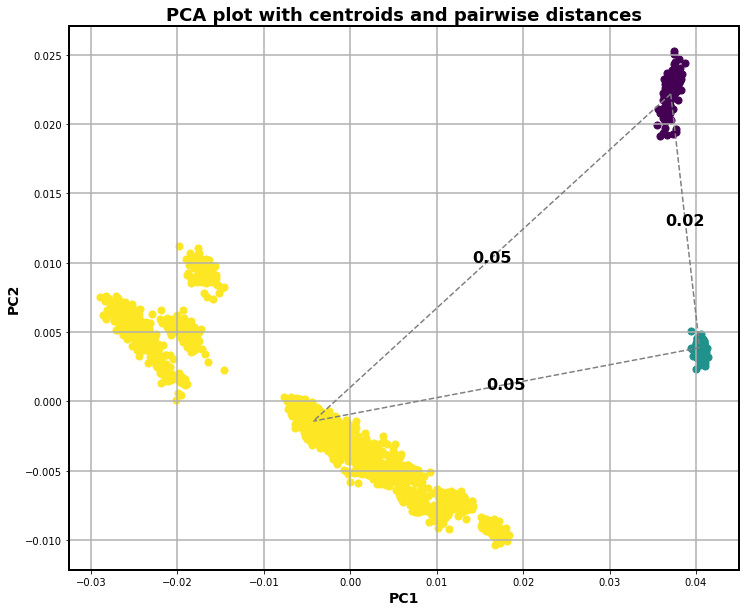

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Set rc parameters to bolden grids and axes
plt.rcParams['axes.linewidth'] = 2  # Bolden axes lines
plt.rcParams['grid.linewidth'] = 1.5  # Bolden grid lines

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200, label=f'Centroid {label}')

# Draw lines and annotate distances
for (label1, label2), distance in distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=16, fontweight='bold', ha='center', va='center')  # Increased fontsize and added fontweight

plt.title('PCA plot with centroids and pairwise distances', fontsize=18, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
#plt.legend()
plt.grid(True)
plt.show()


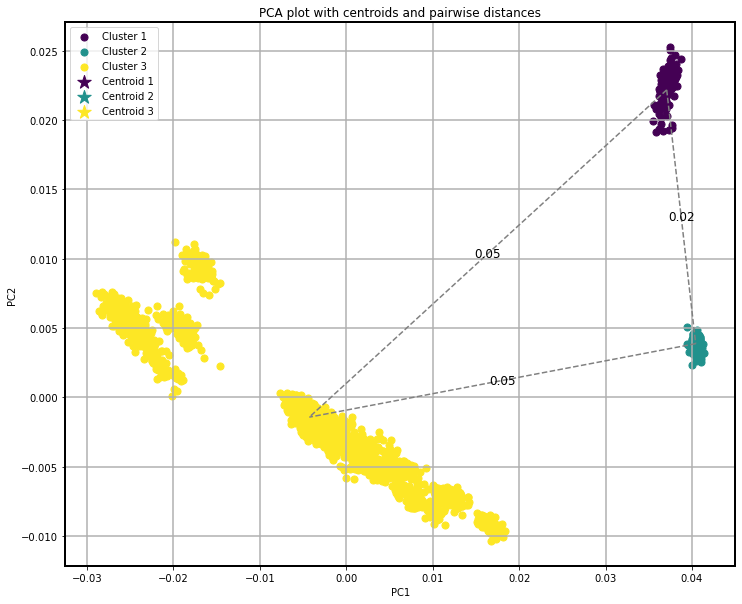

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
    data_df = pd.read_csv('PCA_MULticolor.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200, label=f'Centroid {label}')
    


# Draw lines and annotate distances
for (label1, label2), distance in distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot with centroids and pairwise distances')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


     Distance  Centroid 1  Centroid 2
0    0.018623           1           2
1    0.048218           1           3
2    0.038593           1           4
3    0.043711           1           5
4    0.041012           1           6
..        ...         ...         ...
185  0.002567          17          19
186  0.027825          17          20
187  0.017451          18          19
188  0.042745          18          20
189  0.025304          19          20

[190 rows x 3 columns]


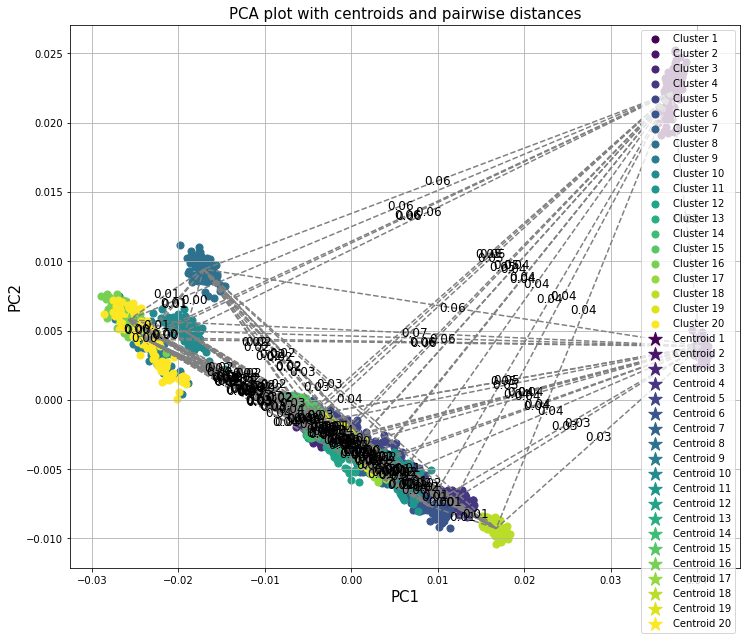

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_1.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('Ola_distances')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200, label=f'Centroid {label}')

# Draw lines and annotate distances
for (label1, label2), distance in distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot with centroids and pairwise distances', fontsize=15)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()


     Distance  Centroid 1  Centroid 2
0    0.018623           1           2
1    0.048218           1           3
2    0.038593           1           4
3    0.043711           1           5
4    0.041012           1           6
..        ...         ...         ...
185  0.002567          17          19
186  0.027825          17          20
187  0.017451          18          19
188  0.042745          18          20
189  0.025304          19          20

[190 rows x 3 columns]


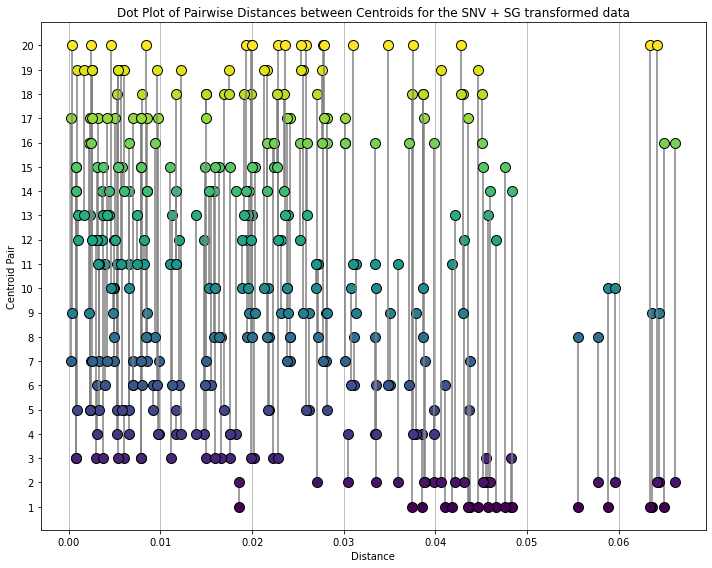

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_1.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_snvsg_20')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the SNV + SG transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


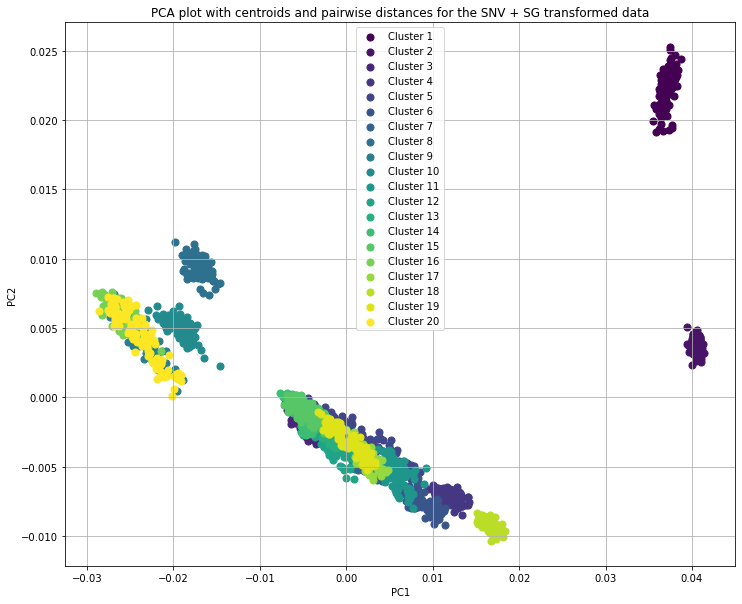

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_1.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot with centroids and pairwise distances for the SNV + SG transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()



     Distance  Centroid 1  Centroid 2
0    3.768697           1           2
1    1.609692           1           3
2    1.069553           1           4
3    0.728229           1           5
4    0.672617           1           6
..        ...         ...         ...
185  0.263478          17          19
186  4.527849          17          20
187  2.486489          18          19
188  6.738765          18          20
189  4.285053          19          20

[190 rows x 3 columns]


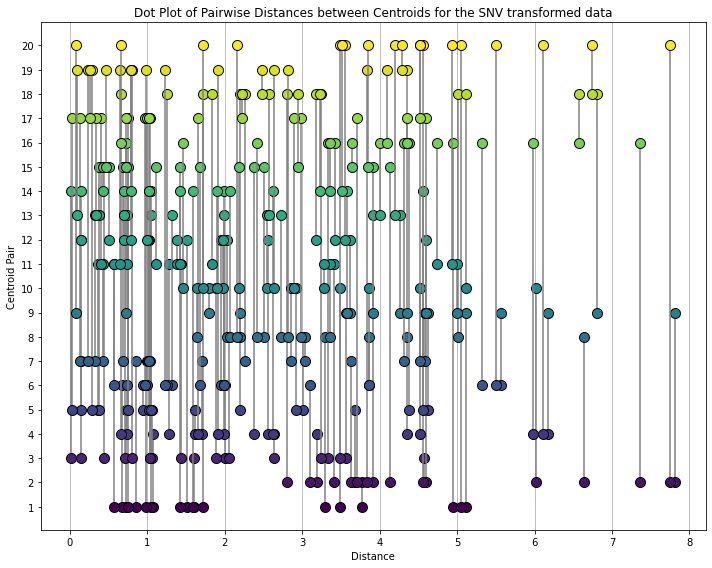

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_SNV.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_SNV_20')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the SNV transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


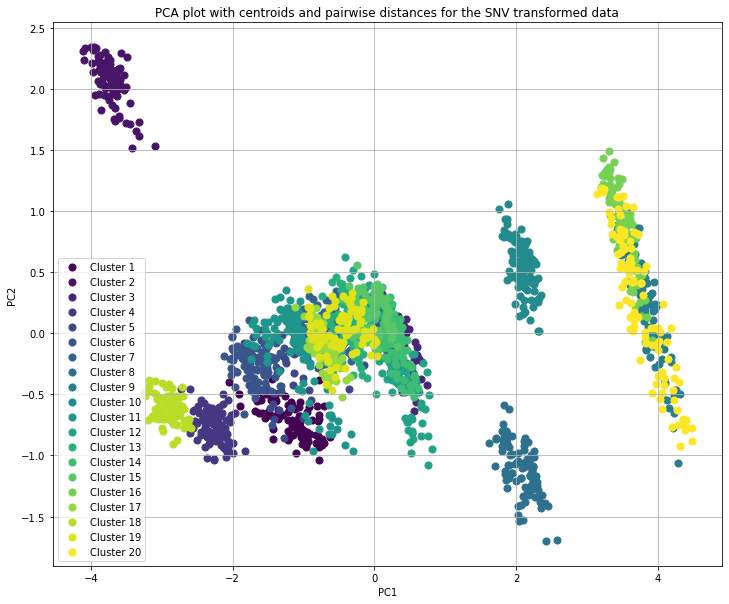

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_SNV.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot with centroids and pairwise distances for the SNV transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

     Distance  Centroid 1  Centroid 2
0    0.783260           1           2
1    4.682972           1           3
2    4.506384           1           4
3    4.291840           1           5
4    4.667270           1           6
..        ...         ...         ...
185  0.276023          17          19
186  0.204487          17          20
187  0.179530          18          19
188  0.281296          18          20
189  0.460147          19          20

[190 rows x 3 columns]


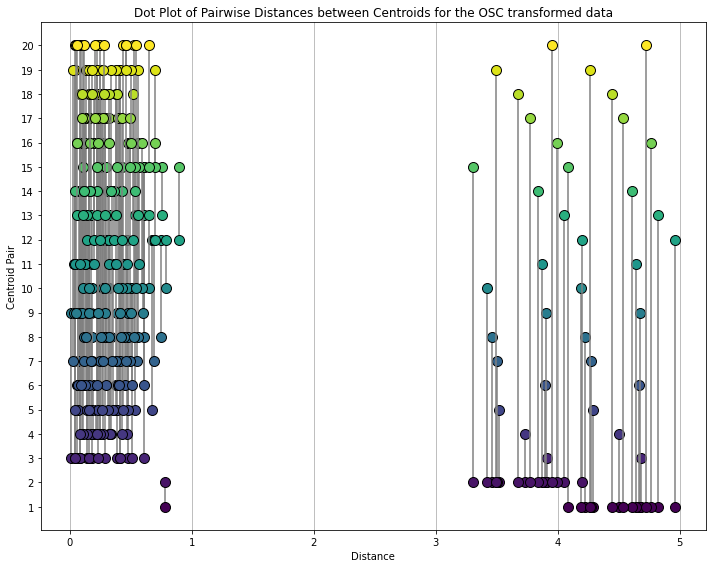

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_OSC.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_OSC_20')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the OSC transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


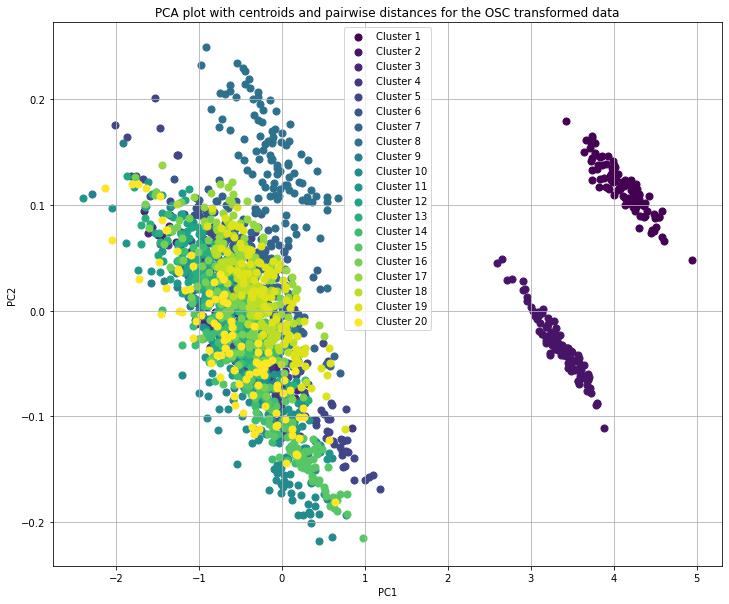

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_OSC.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot with centroids and pairwise distances for the OSC transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


     Distance  Centroid 1  Centroid 2
0    0.018216           1           2
1    0.006086           1           3
2    0.015099           1           4
3    0.008058           1           5
4    0.017761           1           6
..        ...         ...         ...
148  0.002658          15          17
149  0.028279          15          18
150  0.017868          16          17
151  0.043094          16          18
152  0.025875          17          18

[153 rows x 3 columns]


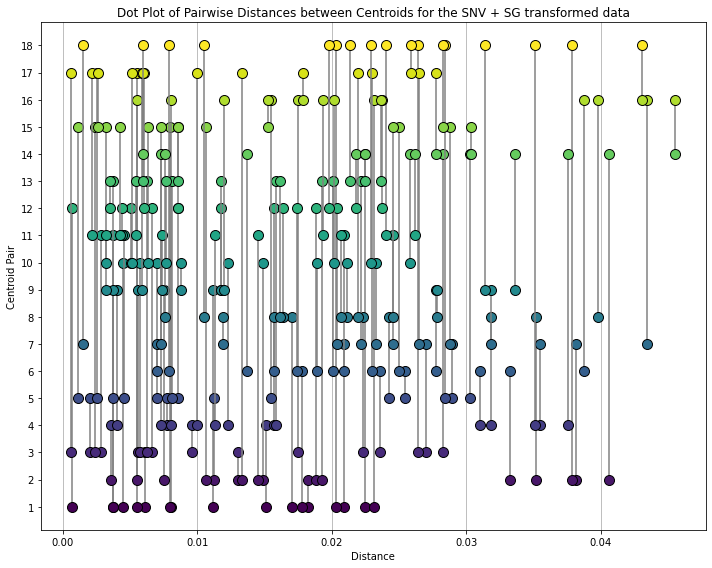

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_1a.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_snvsg_18')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the SNV + SG transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


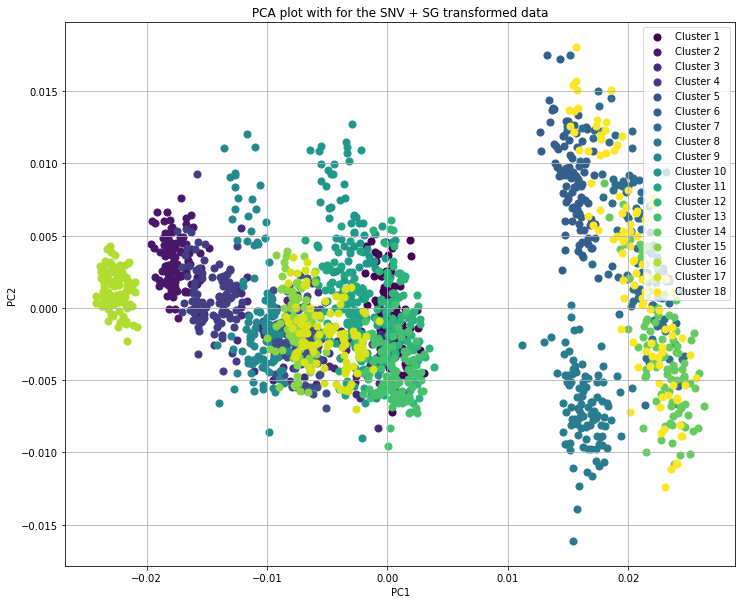

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_1a.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot with for the SNV + SG transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()



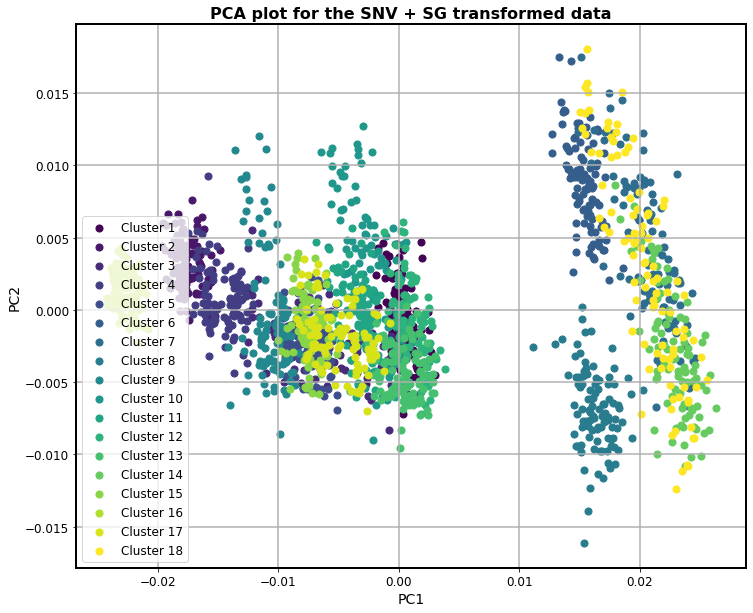

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_1a.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Title with increased font size
plt.title('PCA plot for the SNV + SG transformed data', fontsize=16, fontweight='bold')

# Axes labels with increased font size
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

# Legend with increased font size
plt.legend(fontsize=12)

plt.grid(True)
plt.show()


     Distance  Centroid 1  Centroid 2
0    2.656394           1           2
1    1.076388           1           3
2    2.001692           1           4
3    1.011268           1           5
4    2.065558           1           6
..        ...         ...         ...
148  0.281369          15          17
149  4.560880          15          18
150  2.502114          16          17
151  6.758316          16          18
152  4.331536          17          18

[153 rows x 3 columns]


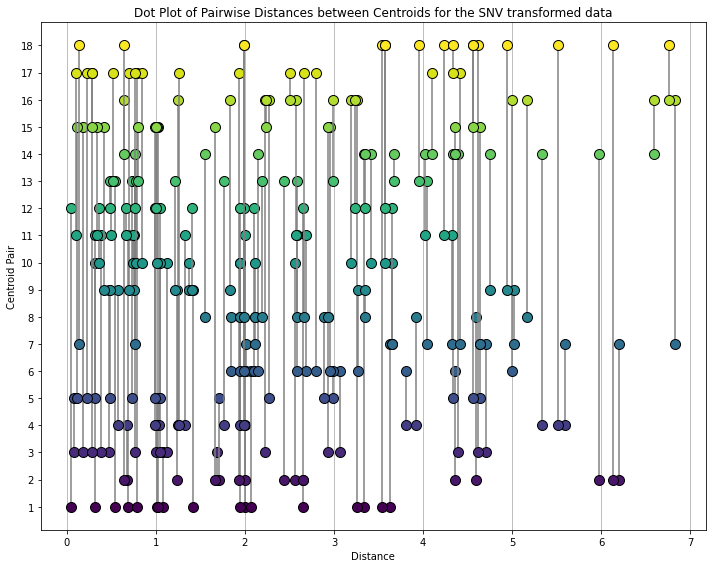

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_SNVa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_SNV_18')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the SNV transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


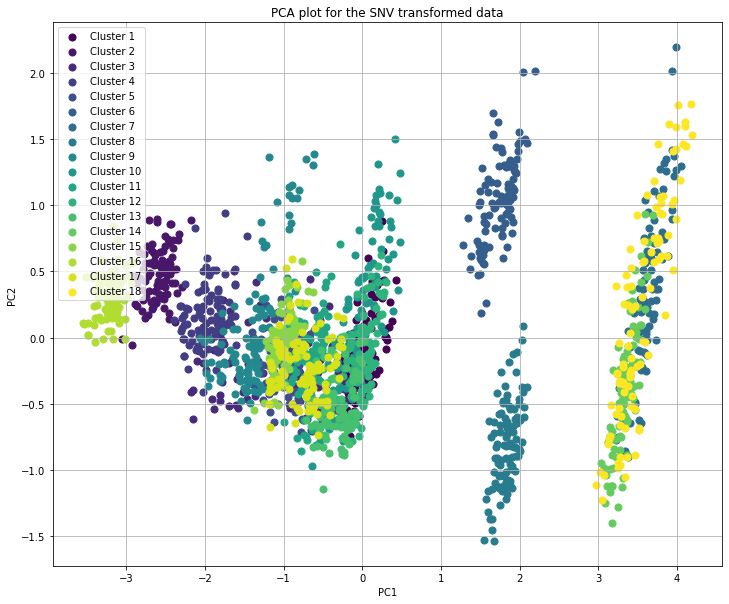

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_SNVa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot for the SNV transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

     Distance  Centroid 1  Centroid 2
0    0.181905           1           2
1    0.392711           1           3
2    0.039278           1           4
3    0.409592           1           5
4    0.490380           1           6
..        ...         ...         ...
148  0.276237          15          17
149  0.201599          15          18
150  0.178285          16          17
151  0.283632          16          18
152  0.460500          17          18

[153 rows x 3 columns]


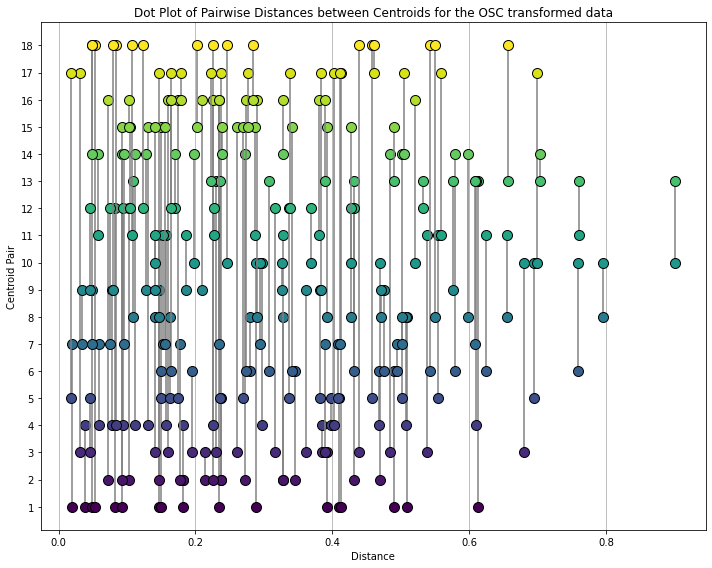

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_OSCa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_OSC_18')


# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the OSC transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


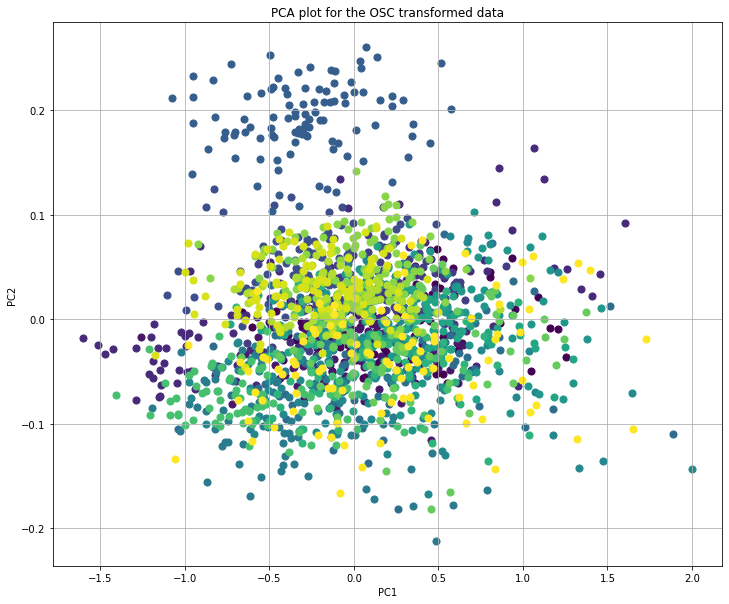

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_OSCa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot for the OSC transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.grid(True)
plt.show()


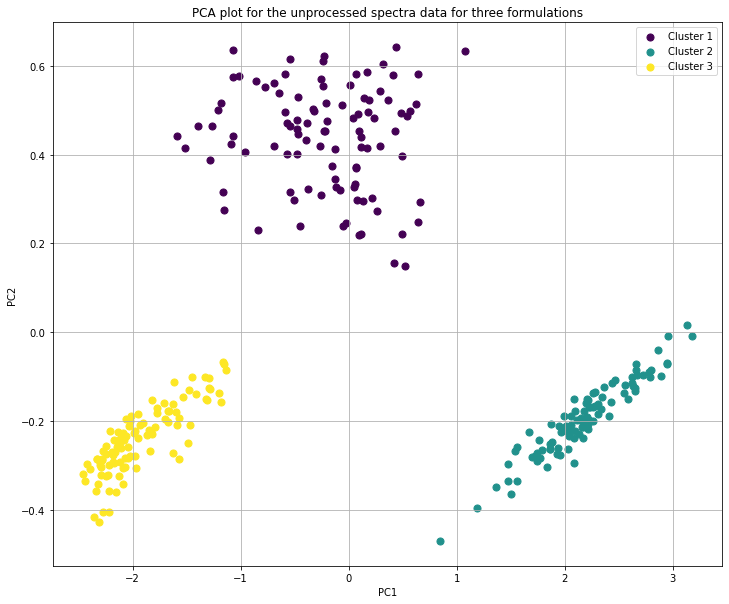

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_3.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids
#for label, centroid in centroids.items():
#    plt.scatter(centroid[0], centroid[1], color='black', marker='*', s=200, label=f'Centroid {label}')

# Annotate distances
#for (label1, label2), distance in distances.items():
#    mid_point = (centroids[label1] + centroids[label2]) / 2
#    plt.annotate(f'{distance:.2f}', mid_point, fontsize=12, ha='center', va='center')

plt.title('PCA plot for the unprocessed spectra data for three formulations')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


   Distance  Centroid 1  Centroid 2
0  2.475237           1           2
1  1.837286           1           3
2  4.100563           2           3


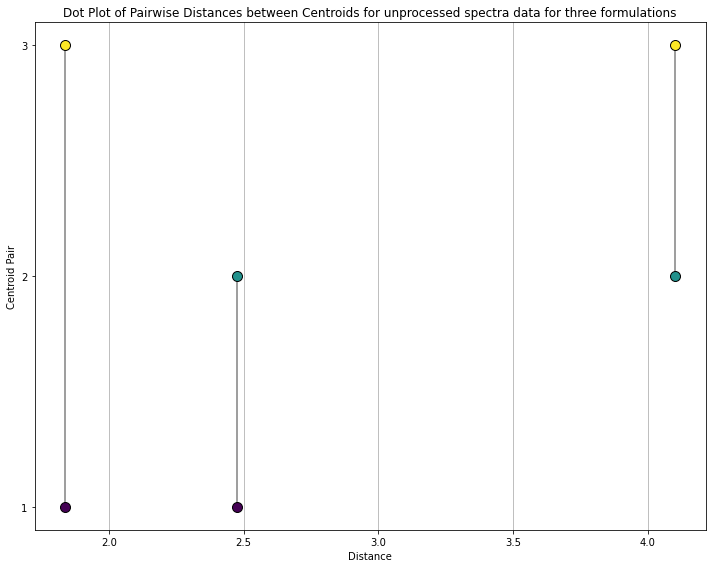

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_3.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_3')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for unprocessed spectra data for three formulations')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


     Distance  Centroid 1  Centroid 2
0    1.857507           1           2
1    0.833630           1           3
2    0.791896           1           4
3    0.833912           1           5
4    1.045731           1           6
..        ...         ...         ...
131  2.279408          14          16
132  0.654583          14          17
133  0.296798          15          16
134  1.385822          15          17
135  1.643226          16          17

[136 rows x 3 columns]


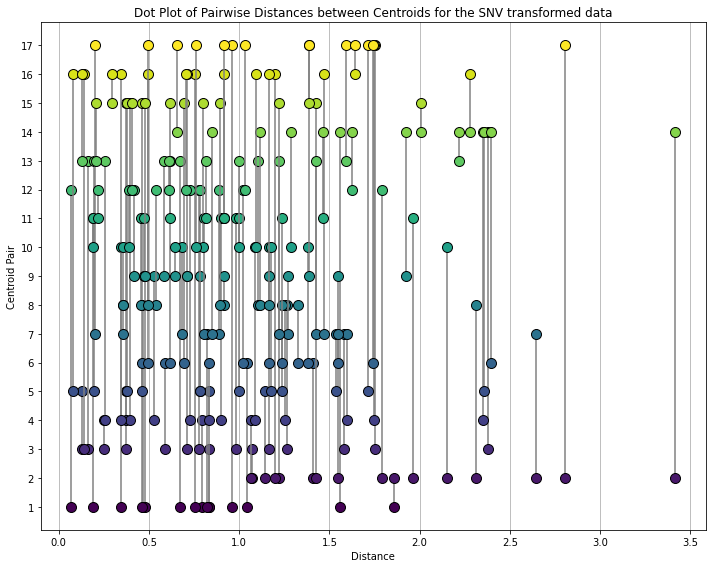

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_17.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_17')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the SNV transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


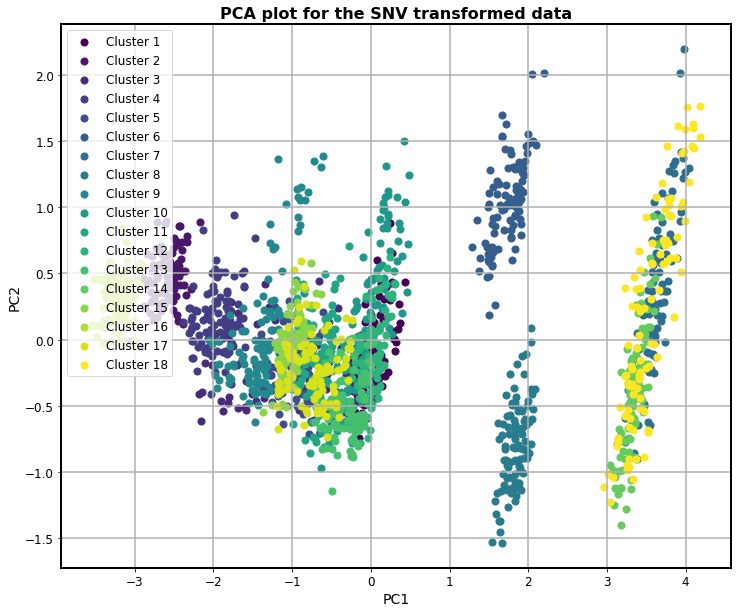

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_SNVa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Title with increased font size
plt.title('PCA plot for the SNV transformed data', fontsize=16, fontweight='bold')

# Axes labels with increased font size
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

# Legend with increased font size
plt.legend(fontsize=12)

plt.grid(True)
plt.show()


     Distance  Centroid 1  Centroid 2
0    0.181905           1           2
1    0.392711           1           3
2    0.039278           1           4
3    0.409592           1           5
4    0.490380           1           6
..        ...         ...         ...
148  0.276237          15          17
149  0.201599          15          18
150  0.178285          16          17
151  0.283632          16          18
152  0.460500          17          18

[153 rows x 3 columns]


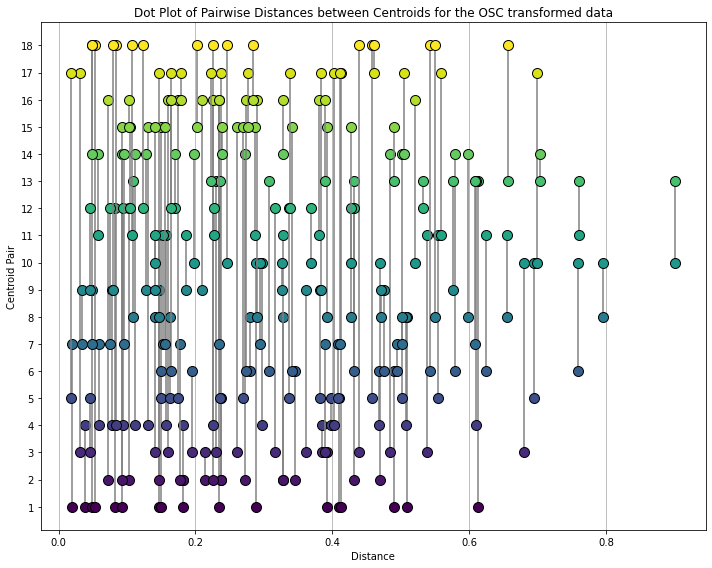

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_OSCa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_osc_18')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for the OSC transformed data')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


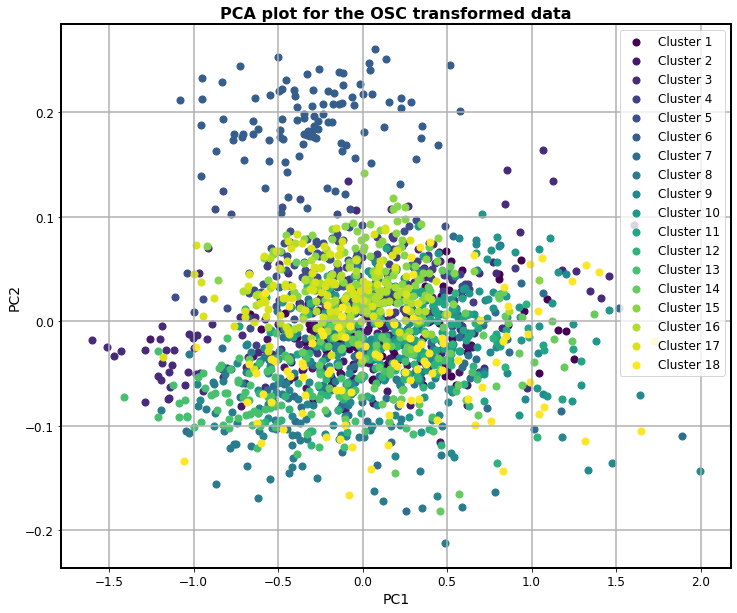

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import cycle

# Read data from the CSV file
data_df = pd.read_csv('PCA_MULticolor_OSCa.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define a cycle of colors for clusters
colors = cycle(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Title with increased font size
plt.title('PCA plot for the OSC transformed data', fontsize=16, fontweight='bold')

# Axes labels with increased font size
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True)
plt.show()


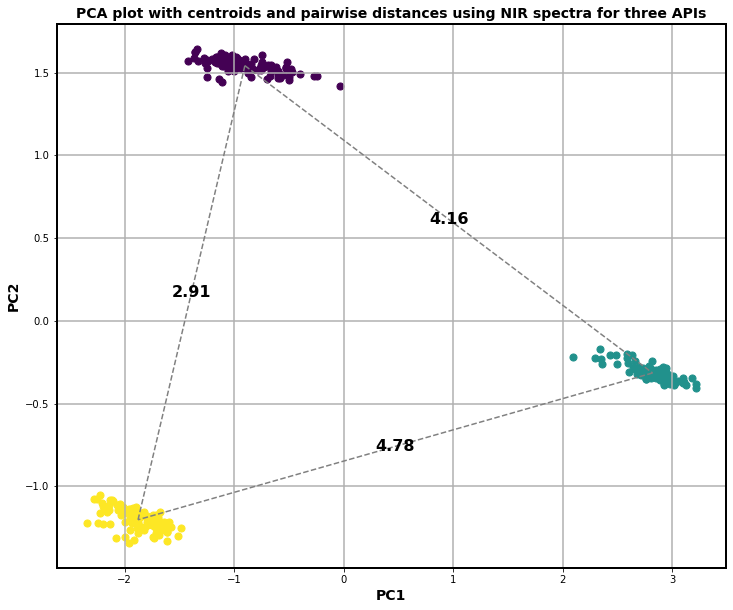

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
data_df = pd.read_csv('SNV_.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Set rc parameters to bolden grids and axes
plt.rcParams['axes.linewidth'] = 2  # Bolden axes lines
plt.rcParams['grid.linewidth'] = 1.5  # Bolden grid lines

# Plot PCA results
plt.figure(figsize=(12, 10))



# Plot samples colored by cluster
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)
    
# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200, label=f'Centroid {label}')

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200, label=f'Centroid {label}')

# Draw lines and annotate distances
for (label1, label2), distance in distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=16, fontweight='bold', ha='center', va='center')  # Increased fontsize and added fontweight

plt.title('PCA plot with centroids and pairwise distances using NIR spectra for three APIs', fontsize=14, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
#plt.legend()
plt.grid(True)
plt.show()


## this is great for intra and inter cluster distances

Average Intra-Cluster Distances:
Cluster 1: 0.24
Cluster 2: 0.15
Cluster 3: 0.17


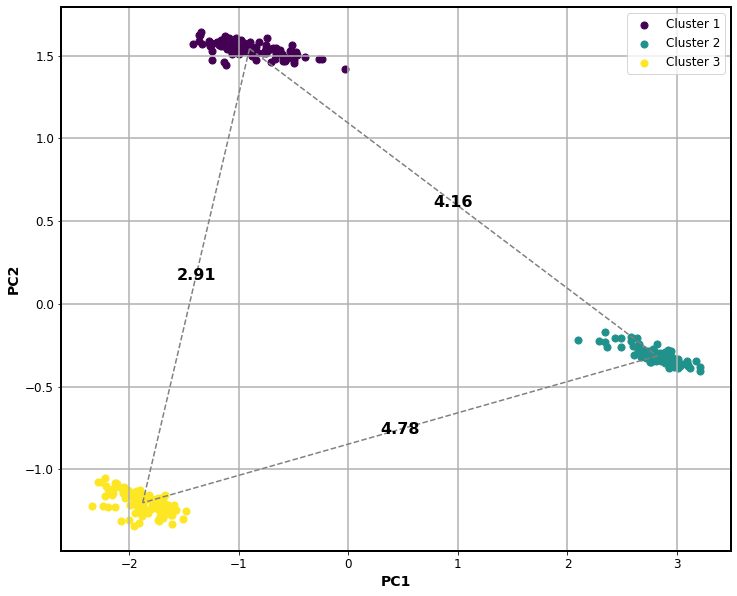

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
data_df = pd.read_csv('SNV_.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
intra_cluster_distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

        # Compute intra-cluster distances
        if i == j:
            cluster_samples = pca_result[labels == label1]
            distances_within_cluster = []
            for sample in cluster_samples:
                distances_within_cluster.append(euclidean(centroids[label1], sample))
            intra_cluster_distances[label1] = np.mean(distances_within_cluster)

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Set rc parameters to bolden grids and axes
plt.rcParams['axes.linewidth'] = 2  # Bolden axes lines
plt.rcParams['grid.linewidth'] = 1.5  # Bolden grid lines

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
scatter_handles = []
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    scatter = plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)
    scatter_handles.append(scatter)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200)

# Draw lines and annotate distances
for (label1, label2), distance in distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=16, fontweight='bold', ha='center', va='center')

# Print average intra-cluster distances
print("Average Intra-Cluster Distances:")
for label, distance in intra_cluster_distances.items():
    print(f'Cluster {label}: {distance:.2f}')

#plt.title('PCA plot with centroids and pairwise distances using NIR spectra for three APIs', fontsize=14, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
plt.legend(handles=scatter_handles, loc='upper right')
plt.grid(True)
plt.show()


# For empty capsules : intra and inter cluster distances

### The average intercluster Euclidean distance between each clusters could be as significant as average intracluster Euclidean distance within each cluster

Average Intra-Cluster Distances:
Cluster 1: 10
Cluster 2: 8
Cluster 3: 7
Cluster 4: 7
Cluster 5: 10
Cluster 6: 12
Cluster 7: 11
Cluster 8: 9
Cluster 9: 14
Cluster 10: 10
Cluster 11: 12
Cluster 12: 9
Cluster 13: 8
Cluster 14: 2
Cluster 15: 1
Cluster 16: 9
Cluster 17: 7
Cluster 18: 0


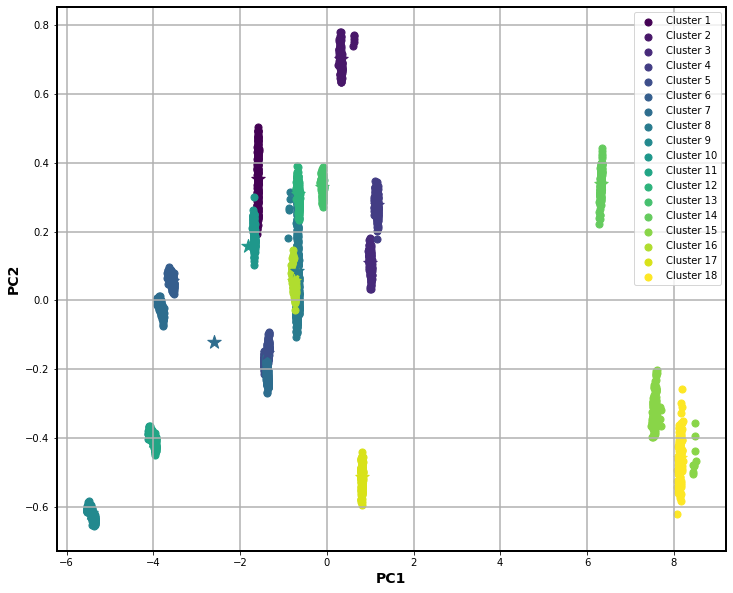

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
data_df = pd.read_csv('empty.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
inter_distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            inter_distances[(label1, label2)] = distance

# Save inter-cluster distances to CSV
inter_distances_df = pd.DataFrame([(label1, label2, distance) for (label1, label2), distance in inter_distances.items()],
                                  columns=['Label1', 'Label2', 'InterDistance'])
inter_distances_df.to_csv('emptydistance.csv', index=False)

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Set rc parameters to bolden grids and axes
plt.rcParams['axes.linewidth'] = 2  # Bolden axes lines
plt.rcParams['grid.linewidth'] = 1.5  # Bolden grid lines

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
scatter_handles = []
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    scatter = plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)
    scatter_handles.append(scatter)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200)

# Plot only the first inter-cluster distance and annotate
#plotted_pairs = set()
#for (label1, label2), distance in inter_distances.items():
#    if label1 not in plotted_pairs and label2 not in plotted_pairs:
#        plt.plot([centroids[label1][0], centroids[label2][0]], 
#                 [centroids[label1][1], centroids[label2][1]], 
#                 linestyle='--', color='grey')
#        
#        mid_point = (centroids[label1] + centroids[label2]) / 2
#        plt.annotate(f'{distance:.1f}', mid_point, fontsize=16, fontweight='bold', ha='center', va='center')
#        
#        plotted_pairs.add(label1)
#        plotted_pairs.add(label2)

# Print and display average intra-cluster distances
print("Average Intra-Cluster Distances:")
intra_distances = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    distances_within_cluster = [euclidean(centroid, sample) for sample in cluster_samples]
    avg_distance = np.mean(distances_within_cluster)
    print(f'Cluster {label}: {avg_distance:.0f}')
    intra_distances[label] = avg_distance

#plt.title('PCA plot with centroids and pairwise distances using NIR spectra for eighteen empty color capsule types', fontsize=14, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
plt.legend(handles=scatter_handles, loc='upper right')
plt.grid(True)
plt.show()


Average Intra-Cluster Distances:
Cluster 1: 9.77
Cluster 2: 7.90
Cluster 3: 7.16
Cluster 4: 7.03
Cluster 5: 9.53
Cluster 6: 11.73
Cluster 7: 10.75
Cluster 8: 8.84
Cluster 9: 13.57
Cluster 10: 9.98
Cluster 11: 12.14
Cluster 12: 8.84
Cluster 13: 8.28
Cluster 14: 1.99
Cluster 15: 0.59
Cluster 16: 8.92
Cluster 17: 7.34
Cluster 18: 0.06


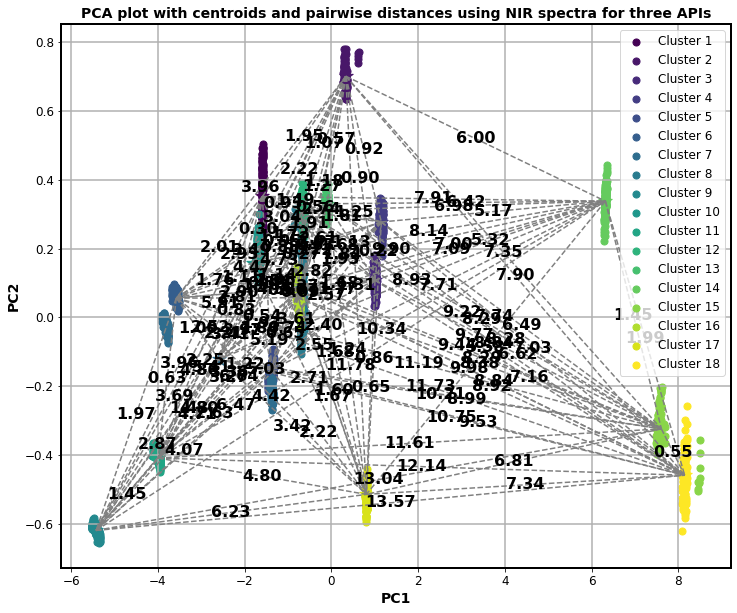

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
data_df = pd.read_csv('empty.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
inter_distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            inter_distances[(label1, label2)] = distance

# Compute intra-cluster distances
intra_distances = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    distances_within_cluster = [euclidean(centroid, sample) for sample in cluster_samples]
    intra_distances[label] = np.mean(distances_within_cluster)

# Convert inter-cluster distances to DataFrame and save to CSV
inter_distances_df = pd.DataFrame([(label1, label2, distance) for (label1, label2), distance in inter_distances.items()],
                                  columns=['Label1', 'Label2', 'InterDistance'])
inter_distances_df.to_csv('emptydistance.csv', index=False)

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Set rc parameters to bolden grids and axes
plt.rcParams['axes.linewidth'] = 2  # Bolden axes lines
plt.rcParams['grid.linewidth'] = 1.5  # Bolden grid lines

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
scatter_handles = []
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    scatter = plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)
    scatter_handles.append(scatter)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200)

# Plot only the first inter-cluster distance and annotate
for (label1, label2), distance in inter_distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=16, fontweight='bold', ha='center', va='center')

# Print and display average intra-cluster distances
print("Average Intra-Cluster Distances:")
for label, distance in intra_distances.items():
    print(f'Cluster {label}: {distance:.2f}')

plt.title('PCA plot with centroids and pairwise distances using NIR spectra for three APIs', fontsize=14, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
plt.legend(handles=scatter_handles, loc='upper right')
plt.grid(True)
plt.show()


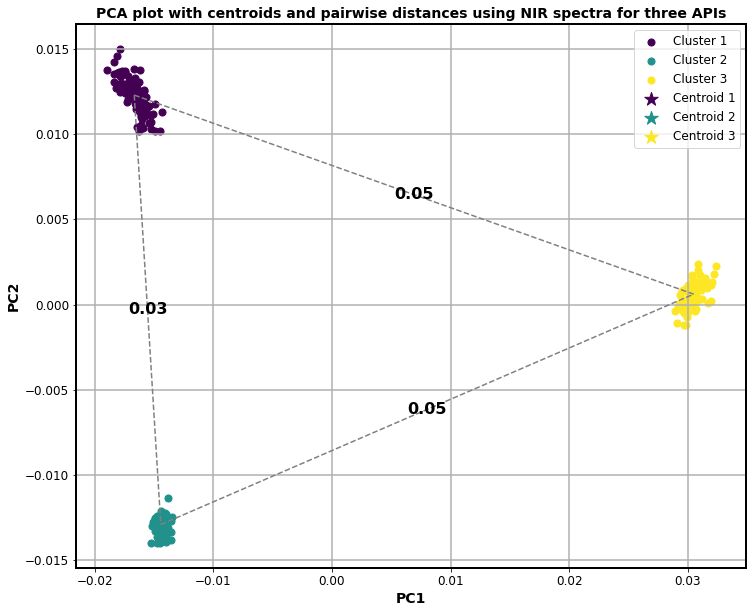

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

# Read data from the CSV file
data_df = pd.read_csv('SNVSG_.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  # Only compute for distinct pairs and avoid duplicates
            distance = euclidean(centroids[label1], centroids[label2])
            distances[(label1, label2)] = distance

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Set rc parameters to bolden grids and axes
plt.rcParams['axes.linewidth'] = 2  # Bolden axes lines
plt.rcParams['grid.linewidth'] = 1.5  # Bolden grid lines

# Plot PCA results
plt.figure(figsize=(12, 10))

# Plot samples colored by cluster
for label, color in zip(unique_labels, centroid_colors):
    cluster_samples = pca_result[labels == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}', s=50, color=color)

# Overlay centroids with different colors
for label, centroid, color in zip(centroids.keys(), centroids.values(), centroid_colors):
    plt.scatter(centroid[0], centroid[1], color=color, marker='*', s=200, label=f'Centroid {label}')

# Draw lines and annotate distances
for (label1, label2), distance in distances.items():
    plt.plot([centroids[label1][0], centroids[label2][0]], 
             [centroids[label1][1], centroids[label2][1]], 
             linestyle='--', color='grey')
    
    mid_point = (centroids[label1] + centroids[label2]) / 2
    plt.annotate(f'{distance:.2f}', mid_point, fontsize=16, fontweight='bold', ha='center', va='center')  # Increased fontsize and added fontweight

plt.title('PCA plot with centroids and pairwise distances using NIR spectra for three APIs', fontsize=14, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
plt.legend()  # Include the legend
plt.grid(True)
plt.show()


   Distance  Centroid 1  Centroid 2
0  4.159435           1           2
1  2.912052           1           3
2  4.780366           2           3


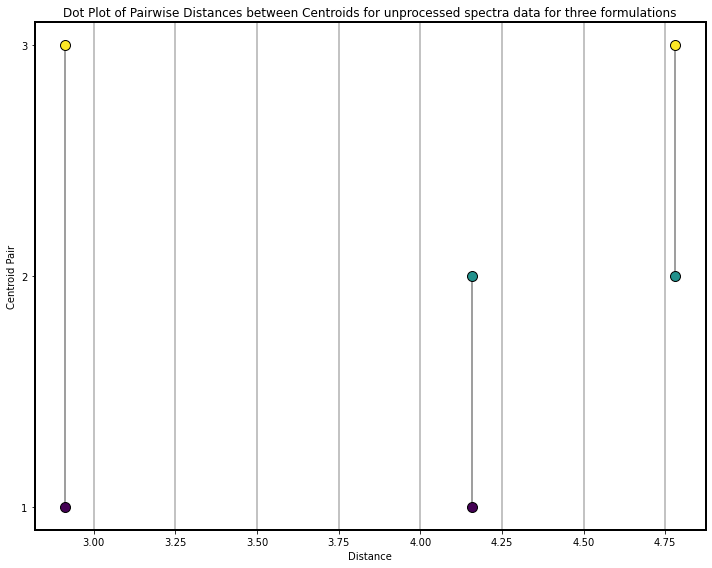

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('SNV_.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_3')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for unprocessed spectra data for three formulations')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


   Distance  Centroid 1  Centroid 2
0  0.025279           1           2
1  0.048594           1           3
2  0.046921           2           3


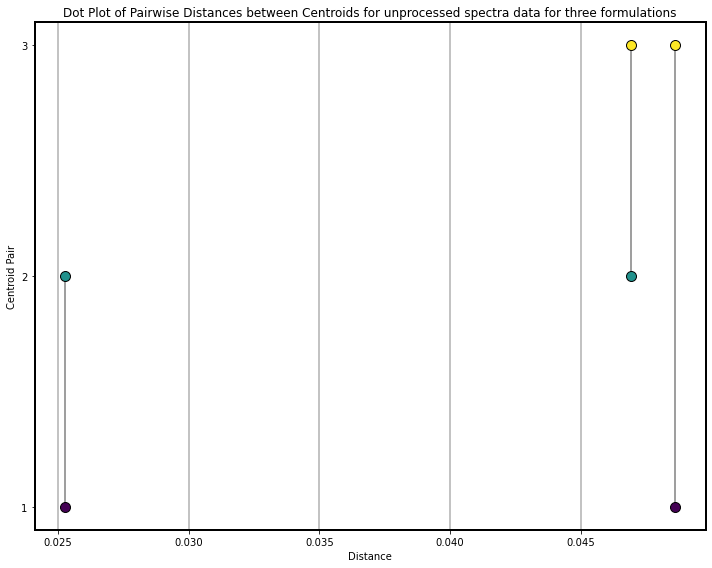

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('SNVSG_.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_3')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for unprocessed spectra data for three formulations')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


   Distance  Centroid 1  Centroid 2
0  0.788781           1           2
1  4.683095           1           3
2  3.913758           2           3


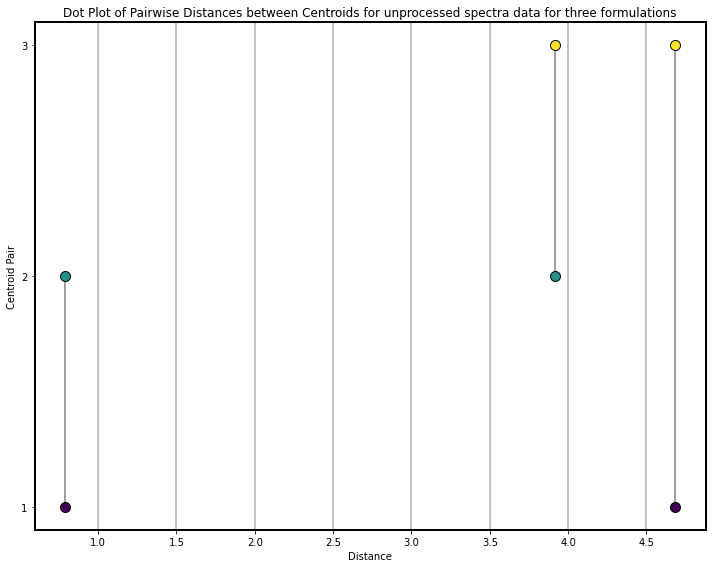

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from itertools import combinations

# Read data from the CSV file
data_df = pd.read_csv('OSC_.csv')

# Extract wavelengths
wavelengths = data_df.columns[1:]

# Extract sample data
samples = data_df[wavelengths].values

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(samples)

# Assuming you have cluster labels
labels = data_df['Cluster'].values

# Identify unique cluster labels
unique_labels = np.unique(labels)

# Compute centroids for each cluster
centroids = {}
for label in unique_labels:
    cluster_samples = pca_result[labels == label]
    centroids[label] = np.mean(cluster_samples, axis=0)

# Compute pairwise Euclidean distances between centroids
distances = {}
for label1, label2 in combinations(unique_labels, 2):
    distance = euclidean(centroids[label1], centroids[label2])
    distances[(label1, label2)] = distance

# Convert distances to DataFrame
distances_df = pd.DataFrame(list(distances.items()), columns=['Centroid Pair', 'Distance'])
distances_df[['Centroid 1', 'Centroid 2']] = pd.DataFrame(distances_df['Centroid Pair'].tolist(), index=distances_df.index)
distances_df = distances_df.drop(columns=['Centroid Pair'])

# Display distances table
print(distances_df)
distances_df.to_csv('distances_df_3')

# Define colors for centroids
centroid_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot dot plot for distances
plt.figure(figsize=(10, 8))

# Assign y-coordinates for each cluster
y_coordinates = {label: i for i, label in enumerate(unique_labels)}

for (label1, label2), distance in distances.items():
    color1 = centroid_colors[np.where(unique_labels == label1)[0][0]]
    color2 = centroid_colors[np.where(unique_labels == label2)[0][0]]
    
    y1 = y_coordinates[label1]
    y2 = y_coordinates[label2]
    
    plt.plot([distance, distance], [y1, y2], '-', color='grey')
    plt.plot(distance, y1, 'o', markersize=10, color=color1, markeredgecolor='black')
    plt.plot(distance, y2, 'o', markersize=10, color=color2, markeredgecolor='black')

# Label y-ticks with cluster labels
plt.yticks(list(y_coordinates.values()), list(y_coordinates.keys()))

plt.title('Dot Plot of Pairwise Distances between Centroids for unprocessed spectra data for three formulations')
plt.xlabel('Distance')
plt.ylabel('Centroid Pair')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
